<a href="https://colab.research.google.com/github/Kumass/Almabetter-Retail_sales_prediction/blob/main/Retail_sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name** - Retail Sales Pridiction
**Project Type** - Regression

**Contribution** - Individual

**Submitted By** - Ashish Kumar



# **Project Summary -**

Rossmann is a well-known retail chain that operates drugstores and supermarkets in several countries, mostly in Europe. We have two csv file Rossmann stores data and store data that contain historical sales data. The data includes information about the store, such as Competitor’s Detail, Store type, Holiday’s, as well as number of the customers and sales transaction, such as
the date, time, and amount of sale on each day. In this project I have done the following:


*   Analyzing the data for Null and Duplicate values and tackling them using

*    different techniques

*   Merging dataframes
*   Handling Outliers and correcting the data types


*   Exploratory Data Analysis (EDA)


*   Hypothesis Testing between Categorical and Numerical variables





*   Hypothesis Testing between Categorical and Numerical variables
*   Categorical Encoding
*   Feature Manipulation

*   Scaling the data using Standard Transform
*   Splitting the data


*   Training different models










At the end of this notebook, I have also presented our Conclusion

# **GitHub Link -**
https://github.com/Kumass/Almabetter-Retail_sales_prediction

# **Problem Statement**
Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied. You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

# **General Guidelines : -**

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know your data***

In [1]:
# Importing packages numpy, pandas, matplotlib, seaborn, missingno
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
# importing scipy library for doing Ttest
from scipy.stats import ttest_ind
# importing libary for VIF calcualtions
from statsmodels.stats.outliers_influence import variance_inflation_factor

# importing Standard scaler, LinearRegression, elasticNet, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# Importing essential libraries to check the accuracy
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

# import ridge regression from sklearn library
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# importing pickle library to save our final model
import pickle

# import lime for model explainability
!pip install lime;
import lime
import lime.lime_tabular


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283838 sha256=d0a5b9284286d0d60fd550852070f6d56e277cc55f3a368e79466c429869018b
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [2]:
# Load Datasets
from google.colab import drive
drive.mount('/content/drive')
# Connecting CSV file from drive to this collab
file_path='/content/drive/MyDrive/Almabetter/store.csv'
file_path1='/content/drive/MyDrive/Almabetter/Rossmann Stores Data.csv'

Mounted at /content/drive


In [43]:
# Store Datasets in df_Store and df_Rossmann variables
df_Store=pd.read_csv(file_path)
df_Rossmann = pd.read_csv(file_path1)

<ipython-input-43-aa499c82207b>:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_Rossmann = pd.read_csv(file_path1)


### Dataset First View

In [4]:
# First 5 dataset of Store data frame
df_Store.head()

Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,Jul,Oct  
3              NaN  
4              NaN

In [5]:
# Last 5 dataset of Store data frame
df_Store.tail()

Store StoreType Assortment  CompetitionDistance  \
1110   1111         a          a               1900.0   
1111   1112         c          c               1880.0   
1112   1113         a          c               9260.0   
1113   1114         a          c                870.0   
1114   1115         d          c               5350.0   

      CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
1110                        6.0                    2014.0       1   
1111                        4.0                    2006.0       0   
1112                        NaN                       NaN       0   
1113                        NaN                       NaN       0   
1114                        NaN                       NaN       1   

      Promo2SinceWeek  Promo2SinceYear     PromoInterval  
1110             31.0           2013.0   Jan,Apr,Jul,Oct  
1111              NaN              NaN               NaN  
1112              NaN              NaN               NaN  
1113              NaN              NaN               NaN  
1114             22.0           2012.0  Mar,Jun,Sept,Dec

In [6]:
# First 5 dataset of Rossmann data frame
df_Rossmann.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

In [7]:
# Last 5 dataset of Rossmann data frame
df_Rossmann.tail()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
1017204   1111          2  2013-01-01      0          0     0      0   
1017205   1112          2  2013-01-01      0          0     0      0   
1017206   1113          2  2013-01-01      0          0     0      0   
1017207   1114          2  2013-01-01      0          0     0      0   
1017208   1115          2  2013-01-01      0          0     0      0   

        StateHoliday  SchoolHoliday  
1017204            a              1  
1017205            a              1  
1017206            a              1  
1017207            a              1  
1017208            a              1

In [8]:
# Count dataset rows and columns
num_of_rows = df_Rossmann.shape[0]                       # Rossmanns dataframe shape
print(f"Total {num_of_rows} Rows in Rossmanns dataframe")

num_of_columns = df_Rossmann.shape[1]
print(f"Total {num_of_columns} Columns in Rossmanns dataframe \n")

num_of_rows = df_Store.shape[0]                          # store dataframe shape
print(f"Total {num_of_rows} Rows in store dataframe")

num_of_columns = df_Store.shape[1]
print(f"Total {num_of_columns} Columns in store dataframe")

Total 1017209 Rows in Rossmanns dataframe
Total 9 Columns in Rossmanns dataframe 

Total 1115 Rows in store dataframe
Total 10 Columns in store dataframe


### Dataset Information

In [9]:
# Info of Rossmann dataset
df_Rossmann.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [10]:
# Info of Store dataset
df_Store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


#### Duplicate Values

In [11]:
# Dataset Duplicate Value Count
num_of_dup_rows = df_Rossmann.duplicated(["Store","Date"]).sum()           #duplicated() method used to find duplicate rows in table based on store and date column
print(f"No. of duplicate rows in rossmann dataset: {num_of_dup_rows}")

No. of duplicate rows in rossmann dataset: 0


In [12]:
num_of_dup_rows = df_Store.duplicated(["Store"]).sum()
print(f"No. of duplicate rows in store dataset: {num_of_dup_rows}")

No. of duplicate rows in store dataset: 0


Here we can see that there is no duplicates in the both datasets

#### Missing Values/Null Values

In [13]:
# Missing Values/Null Values Count
df_Rossmann.isnull().sum()            #isnull() method used to check null values in columns


Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [14]:
df_Store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

There are missing values in the following columns -

*   CompetitionDistance - Distance in meters to the nearest competitor store, the distribution plot would give us an idea about the distances at which generally the stores are opened and we would impute the values accordingly.
*   CompetitionOpenSinceMonth - Gives the approximate month of the time the nearest competitor was opened, mode of the column would tell us the most occuring month.
*   CompetitionOpenSinceYear - Gives the approximate year of the time the nearest competitor was opened, mode of the column would tell us the most occuring year.
*   Promo2SinceWeek, Promo2SinceYear and PromoInterval are NaN wherever Promo2 is 0 or False as can be seen in the first look of the dataset. They can be replaced with 0.

                           missing_values_count
Store                                         0
StoreType                                     0
Assortment                                    0
CompetitionDistance                           3
CompetitionOpenSinceMonth                   354
CompetitionOpenSinceYear                    354
Promo2                                        0
Promo2SinceWeek                             544
Promo2SinceYear                             544
PromoInterval                               544


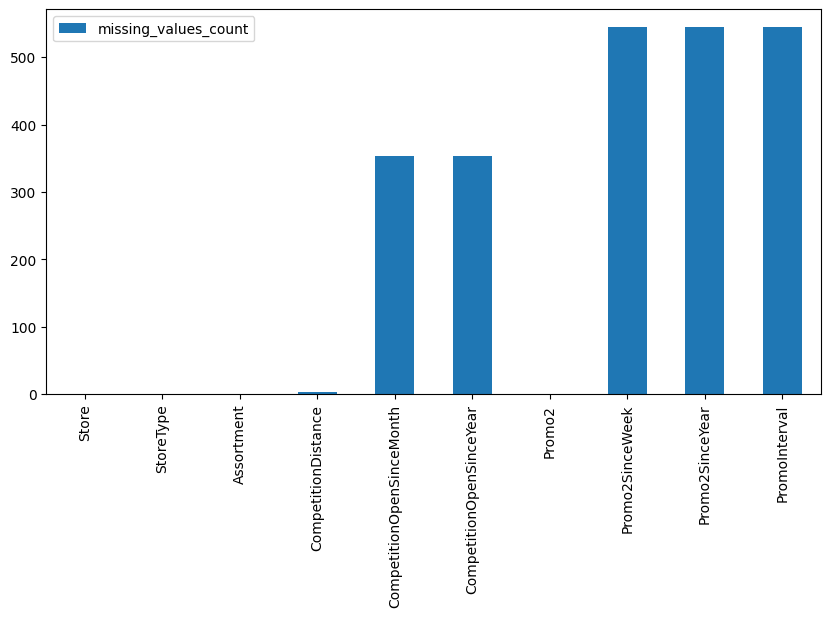

In [44]:
# Visualizing the missing values

# counting total value which are missing/NaN
missing_value_data=pd.DataFrame(df_Store.isnull().sum(),columns=['missing_values_count'])

#creating Bar chart
plt.rcParams['figure.figsize'] = (10,5)
missing_value_data.plot(kind='bar')
print(missing_value_data)


In [16]:

missing_value_percentage = pd.DataFrame((missing_value_data/df_Store.shape[0])*100)                 #Calculating percentage
missing_value_percentage["count"] = list(df_Store.isnull().sum().values)                            #Adding count column
missing_value_percentage.rename(columns={'missing_values_count':"% of Null Values"},inplace=True)   #Renaming column name
missing_value_percentage.sort_values(by = ["count"],ascending= False)                               #Sorting data in decending order



% of Null Values  count
Promo2SinceWeek                   48.789238    544
Promo2SinceYear                   48.789238    544
PromoInterval                     48.789238    544
CompetitionOpenSinceMonth         31.748879    354
CompetitionOpenSinceYear          31.748879    354
CompetitionDistance                0.269058      3
Store                              0.000000      0
StoreType                          0.000000      0
Assortment                         0.000000      0
Promo2                             0.000000      0

### What did you know about your dataset?

Our dataset containing information from two datasets: Rossmann Store Sales and Store.

1.  Rossmann dataset contains 9 columns having information about daily sales data for 1115 stores in Germany from January 2013 to July 2015.
2. Store dataset contains 10 columns having information about Competitior data like distance from compititor, compititor store opening etc. for 1115 stores in Germany.
3. Rossmann data don't have null values.
4. Store dataset contains Six columns having missing values in them.

## ***2. Understanding Your Variables***

In [19]:
# Dataset Columns
print("Rosmann datasets columns:",list(df_Rossmann.columns))
print("Store datasets columns:",list(df_Store.columns))

Rosmann datasets columns: ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']
Store datasets columns: ['Store', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']


In [20]:
# Rossmann Dataset Describe
df_Rossmann.describe(include="all")

Store     DayOfWeek        Date         Sales     Customers  \
count   1.017209e+06  1.017209e+06     1017209  1.017209e+06  1.017209e+06   
unique           NaN           NaN         942           NaN           NaN   
top              NaN           NaN  2015-07-31           NaN           NaN   
freq             NaN           NaN        1115           NaN           NaN   
mean    5.584297e+02  3.998341e+00         NaN  5.773819e+03  6.331459e+02   
std     3.219087e+02  1.997391e+00         NaN  3.849926e+03  4.644117e+02   
min     1.000000e+00  1.000000e+00         NaN  0.000000e+00  0.000000e+00   
25%     2.800000e+02  2.000000e+00         NaN  3.727000e+03  4.050000e+02   
50%     5.580000e+02  4.000000e+00         NaN  5.744000e+03  6.090000e+02   
75%     8.380000e+02  6.000000e+00         NaN  7.856000e+03  8.370000e+02   
max     1.115000e+03  7.000000e+00         NaN  4.155100e+04  7.388000e+03   

                Open         Promo StateHoliday  SchoolHoliday  
count   1.017209e+06  1.017209e+06      1017209   1.017209e+06  
unique           NaN           NaN            5            NaN  
top              NaN           NaN            0            NaN  
freq             NaN           NaN       855087            NaN  
mean    8.301067e-01  3.815145e-01          NaN   1.786467e-01  
std     3.755392e-01  4.857586e-01          NaN   3.830564e-01  
min     0.000000e+00  0.000000e+00          NaN   0.000000e+00  
25%     1.000000e+00  0.000000e+00          NaN   0.000000e+00  
50%     1.000000e+00  0.000000e+00          NaN   0.000000e+00  
75%     1.000000e+00  1.000000e+00          NaN   0.000000e+00  
max     1.000000e+00  1.000000e+00          NaN   1.000000e+00

In [21]:
# Store Dataset Describe
df_Store.describe(include="all")

Store StoreType Assortment  CompetitionDistance  \
count   1115.00000      1115       1115          1112.000000   
unique         NaN         4          3                  NaN   
top            NaN         a          a                  NaN   
freq           NaN       602        593                  NaN   
mean     558.00000       NaN        NaN          5404.901079   
std      322.01708       NaN        NaN          7663.174720   
min        1.00000       NaN        NaN            20.000000   
25%      279.50000       NaN        NaN           717.500000   
50%      558.00000       NaN        NaN          2325.000000   
75%      836.50000       NaN        NaN          6882.500000   
max     1115.00000       NaN        NaN         75860.000000   

        CompetitionOpenSinceMonth  CompetitionOpenSinceYear       Promo2  \
count                  761.000000                761.000000  1115.000000   
unique                        NaN                       NaN          NaN   
top                           NaN                       NaN          NaN   
freq                          NaN                       NaN          NaN   
mean                     7.224704               2008.668857     0.512108   
std                      3.212348                  6.195983     0.500078   
min                      1.000000               1900.000000     0.000000   
25%                      4.000000               2006.000000     0.000000   
50%                      8.000000               2010.000000     1.000000   
75%                     10.000000               2013.000000     1.000000   
max                     12.000000               2015.000000     1.000000   

        Promo2SinceWeek  Promo2SinceYear    PromoInterval  
count        571.000000       571.000000              571  
unique              NaN              NaN                3  
top                 NaN              NaN  Jan,Apr,Jul,Oct  
freq                NaN              NaN              335  
mean          23.595447      2011.763573              NaN  
std           14.141984         1.674935              NaN  
min            1.000000      2009.000000              NaN  
25%           13.000000      2011.000000              NaN  
50%           22.000000      2012.000000              NaN  
75%           37.000000      2013.000000              NaN  
max           50.000000      2015.000000              NaN

### Variables Description

**The dataset include following columns:**

Store: An integer indicating the store number.

DayOfWeek: An integer indicating the day of the week (1-7, where 1 is Sunday).

Date: The date in yyyy-mm-dd format.

Sales: The amount of sales for a given store on a given day (target variable).

Customers: The number of customers who visited the store on a given day.

Open: A binary variable indicating whether the store was open (1) or closed (0) on a given day.

Promo: A binary variable indicating whether a store was running a promotion on a given day.

StateHoliday: A categorical variable indicating whether a state holiday was in effect on a given day (0 = no, a = public holiday, b = Easter holiday, c = Christmas).

SchoolHoliday: A binary variable indicating whether a school holiday was in effect on a given day.

StoreType: A categorical variable indicating the type of store (a, b, c, d).

Assortment: A categorical variable indicating the type of assortment that the store carries (a = basic, b = extra, c = extended).

CompetitionDistance: Distance in meters to the nearest competitor store.

CompetitionOpenSinceMonth: The month of the year when the nearest competitor was first observed to be open.

CompetitionOpenSinceYear: The year when the nearest competitor was first observed to be open.

Promo2: A binary variable indicating whether a store was running a consecutive promotion (0 = no, 1 = consecutive promotion).

Promo2SinceWeek: The week of the year when the store started running consecutive promotions.

Promo2SinceYear: The year when the store started running consecutive promotions.

PromoInterval: A categorical variable indicating the consecutive promotion interval, i.e., the months the promotion runs, in the format "Jan,Apr,Jul,Oct".

### Check Unique Values for each variable.

In [22]:
# Check Unique Values for each variable.
df_Rossmann.nunique()

Store             1115
DayOfWeek            7
Date               942
Sales            21734
Customers         4086
Open                 2
Promo                2
StateHoliday         5
SchoolHoliday        2
dtype: int64

In [23]:
#unique values in df_store
df_Store.nunique()

Store                        1115
StoreType                       4
Assortment                      3
CompetitionDistance           654
CompetitionOpenSinceMonth      12
CompetitionOpenSinceYear       23
Promo2                          2
Promo2SinceWeek                24
Promo2SinceYear                 7
PromoInterval                   3
dtype: int64

## 3. ***Data Wrangling***

In [24]:
#checking rows with null values in CompetitionDistance column
df_Store[df_Store["CompetitionDistance"].isnull()]

Store StoreType Assortment  CompetitionDistance  \
290    291         d          a                  NaN   
621    622         a          c                  NaN   
878    879         d          a                  NaN   

     CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
290                        NaN                       NaN       0   
621                        NaN                       NaN       0   
878                        NaN                       NaN       1   

     Promo2SinceWeek  Promo2SinceYear    PromoInterval  
290              NaN              NaN              NaN  
621              NaN              NaN              NaN  
878              5.0           2013.0  Feb,May,Aug,Nov

CompetitionDistance column have 3 null values which is less than 1% of all data. So we decided to fill it with Median.

In [25]:
#filling the missing values of Competition Distance with median
df_Store['CompetitionDistance'].fillna(value = int(df_Store.CompetitionDistance.median()), inplace = True)


In [26]:
#rechecking the null values in CompetitionDistance
df_Store[df_Store["CompetitionDistance"].isnull()]

Empty DataFrame
Columns: [Store, StoreType, Assortment, CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2, Promo2SinceWeek, Promo2SinceYear, PromoInterval]
Index: []

In [27]:
#checking rows with null values in CompetitionOpenSinceMonth column
df_Store[df_Store['CompetitionOpenSinceMonth'].isnull()]

Store StoreType Assortment  CompetitionDistance  \
11       12         a          c               1070.0   
12       13         d          a                310.0   
15       16         a          c               3270.0   
18       19         a          c               3240.0   
21       22         a          a               1040.0   
...     ...       ...        ...                  ...   
1095   1096         a          c               1130.0   
1099   1100         a          a                540.0   
1112   1113         a          c               9260.0   
1113   1114         a          c                870.0   
1114   1115         d          c               5350.0   

      CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
11                          NaN                       NaN       1   
12                          NaN                       NaN       1   
15                          NaN                       NaN       0   
18                          NaN                       NaN       1   
21                          NaN                       NaN       1   
...                         ...                       ...     ...   
1095                        NaN                       NaN       1   
1099                        NaN                       NaN       1   
1112                        NaN                       NaN       0   
1113                        NaN                       NaN       0   
1114                        NaN                       NaN       1   

      Promo2SinceWeek  Promo2SinceYear     PromoInterval  
11               13.0           2010.0   Jan,Apr,Jul,Oct  
12               45.0           2009.0   Feb,May,Aug,Nov  
15                NaN              NaN               NaN  
18               22.0           2011.0  Mar,Jun,Sept,Dec  
21               22.0           2012.0   Jan,Apr,Jul,Oct  
...               ...              ...               ...  
1095             10.0           2014.0  Mar,Jun,Sept,Dec  
1099             14.0           2011.0   Jan,Apr,Jul,Oct  
1112              NaN              NaN               NaN  
1113              NaN              NaN               NaN  
1114             22.0           2012.0  Mar,Jun,Sept,Dec  

[354 rows x 10 columns]

In [28]:
#groupby() function is used on CompetitionOpenSinceYear column to check how many competitions are there in one year
df_Store.groupby("CompetitionOpenSinceYear")["CompetitionOpenSinceYear"].count()


CompetitionOpenSinceYear
1900.0     1
1961.0     1
1990.0     5
1994.0     2
1995.0     2
1998.0     1
1999.0     8
2000.0    10
2001.0    16
2002.0    27
2003.0    19
2004.0    22
2005.0    62
2006.0    47
2007.0    48
2008.0    54
2009.0    54
2010.0    55
2011.0    54
2012.0    82
2013.0    83
2014.0    70
2015.0    38
Name: CompetitionOpenSinceYear, dtype: int64

In [29]:
#groupby() function is used on CompetitionOpenSinceMonth column to check how many competitions are there in one month
df_Store.groupby("CompetitionOpenSinceMonth")["CompetitionOpenSinceMonth"].count()


CompetitionOpenSinceMonth
1.0      14
2.0      41
3.0      70
4.0      94
5.0      44
6.0      50
7.0      67
8.0      39
9.0     125
10.0     61
11.0     92
12.0     64
Name: CompetitionOpenSinceMonth, dtype: int64

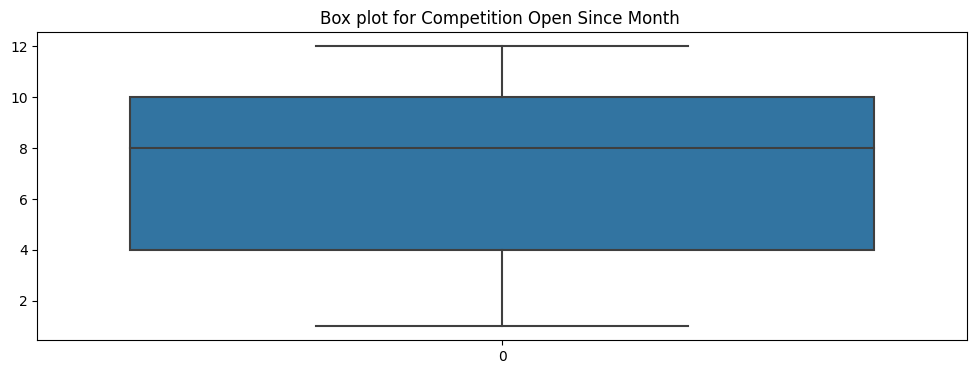

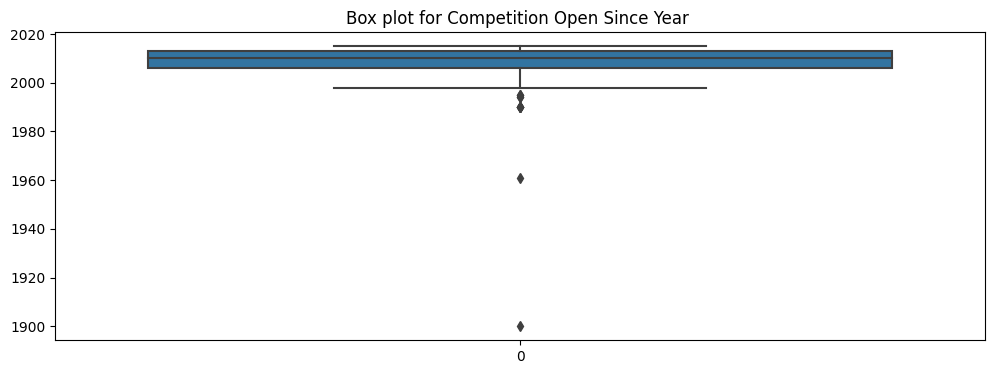

In [30]:
#plotting box plot for CompetitionOpenSinceMonth and CompetitionOpenSinceYear
plt.figure(figsize=(12,4))
sns.boxplot(df_Store["CompetitionOpenSinceMonth"])
plt.title("Box plot for Competition Open Since Month ")
plt.show()

plt.figure(figsize=(12,4))
sns.boxplot(df_Store["CompetitionOpenSinceYear"])
plt.title("Box plot for Competition Open Since Year ")
plt.show()

In [33]:
#filling the missing values with mode
df_Store['CompetitionOpenSinceMonth'].fillna(value = df_Store['CompetitionOpenSinceMonth'].mode()[0], inplace = True)
df_Store['CompetitionOpenSinceYear'].fillna(value = df_Store['CompetitionOpenSinceYear'].mode()[0], inplace = True)


In [32]:

#rechecking the null values in CompetitionOpenSinceMonth
df_Store[df_Store['CompetitionOpenSinceMonth'].isnull()]

Empty DataFrame
Columns: [Store, StoreType, Assortment, CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2, Promo2SinceWeek, Promo2SinceYear, PromoInterval]
Index: []

In [34]:
#rechecking the null values in CompetitionOpenSinceYear
df_Store[df_Store['CompetitionOpenSinceYear'].isnull()]

Empty DataFrame
Columns: [Store, StoreType, Assortment, CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2, Promo2SinceWeek, Promo2SinceYear, PromoInterval]
Index: []

In [35]:
# filling the missing values with value 0 (Promo2SinceWeek, Promo2SinceYear and PromoInterval feature)
df_Store["Promo2SinceWeek"].fillna(value = 0, inplace=True)
df_Store["Promo2SinceYear"].fillna(value = 0, inplace=True)
df_Store["PromoInterval"].fillna(value = 0, inplace=True)

In [36]:
#Rechecking for null values
df_Store.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [37]:
# merging two dataframes on store column using left join
merged_df= df_Rossmann.merge(right=df_Store,how="left",on="Store")
merged_df.shape

(1017209, 18)

In [38]:
#checking the datatypes for the different columns in the Dataframe.
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [39]:
# changing dtype into suitable format from both the datasets
merged_df["Date"]= pd.to_datetime(merged_df["Date"])
merged_df["CompetitionDistance"]= merged_df["CompetitionDistance"].astype(int)
merged_df["CompetitionOpenSinceMonth"]= merged_df["CompetitionOpenSinceMonth"].astype(int)
merged_df["CompetitionOpenSinceYear"]= merged_df["CompetitionOpenSinceYear"].astype(int)
merged_df["Promo2SinceWeek"]= merged_df["Promo2SinceWeek"].astype(int)
merged_df["Promo2SinceYear"]= merged_df["Promo2SinceYear"].astype(int)

In [40]:
#Rechecking the datatypes
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

In [41]:
#Creating 5 new columns for Days, Weeks of the year , month and year for Date column
merged_df["Date"]=pd.to_datetime(merged_df["Date"])
merged_df["Year"]=merged_df["Date"].dt.year
merged_df["Month"]=merged_df["Date"].dt.month
merged_df["day"]=merged_df["Date"].dt.day
merged_df["WeekOfYear"]=merged_df["Date"].dt.weekofyear

<ipython-input-41-13cfa63c2644>:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  merged_df["WeekOfYear"]=merged_df["Date"].dt.weekofyear


In [42]:
print(merged_df.shape)
merged_df.info()

(1017209, 22)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 22 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance    

### What all manipulations have you done and insights you found?

We have done Data Wrangling process in three steps:

* Handling Missing Values- We have observed that we have missing values in 6 columns of store Dataset.

   * CompetitionDistance - In this column we replaced the missing values with Median (beacuse the data was positively skewed)
   * CompetitionOpenSinceMonth , CompetitionOpenSinceYear - Missing values in these columns are replaced by their mode value.
   * Promo2SinceWeek , Promo2SinceYear , PromoInterval - Missing values are replaced by zero
* Merging Dataset - We merged the two datasets using left join, and since there are no null values so the right join or inner join will also give us the same results.

* Typecasting - We have converted Date column to datetime and float variables to integer.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

Chart - 1- Daily Mean Sale of Stores

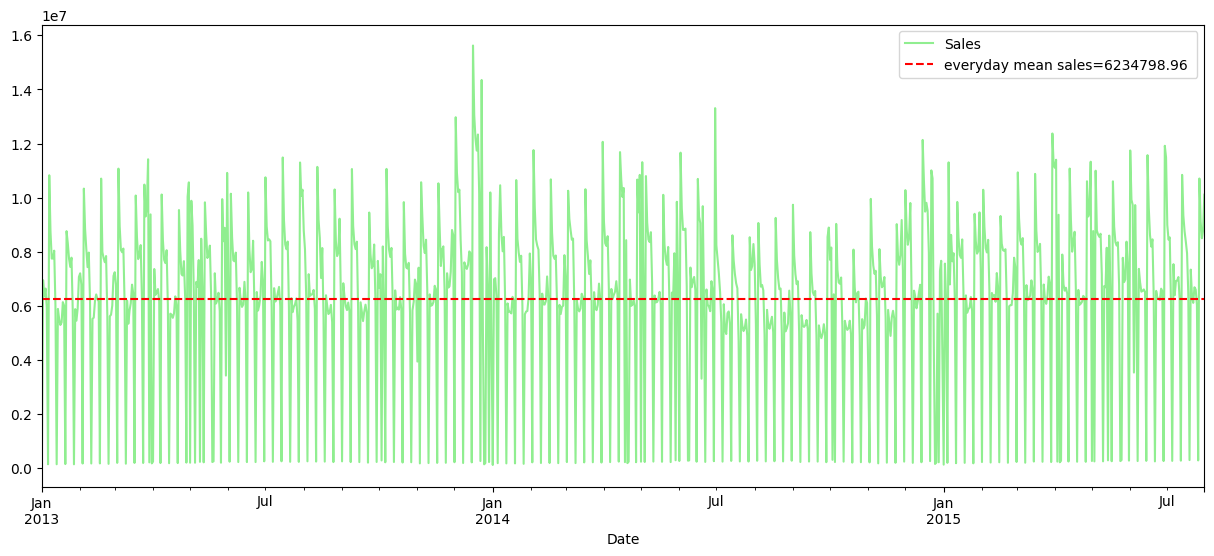

In [ ]:
# Chart1 - visualization code

#Visualizing everyday sales with average everyday sales
plt.subplots(figsize=(15,6))

daily_sales=merged_df.groupby(["Date"]).Sales.sum()                  #Grouping sum of daily sale Data
daily_sales.plot(kind="line", color="lightgreen")                    #Creating line chart
plt.axhline(y=daily_sales.mean(),label=f"everyday mean sales={round(daily_sales.mean(),2)} ",color="red", linestyle="--")         #Code of Mean line
plt.legend()

1. Why did you pick the specific chart?

Line Chart was choosen to analyze the total daily sales fluctuations on it because they are particularly effective in illustrating how data points change and evolve over time. Line charts are relatively simple and easy to interpret compared to other chart types. They provide a clear visual representation of data without excessive clutter or distractions, making them accessible to a wide range of viewers.

2. What is/are the insight(s) found from the chart?

Mean line shows everyday mean sale is 62,34,798.96/- that means 1115 Stores make this average sale. So average sale for 1 store will be Everyday meansale/1115 =5591.74/-

3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

From visual analysis, we can conclude that the sales are almost evenly distributed around the average sales which imples that overall daily sales have stabilised and new innovative steps need to be taken to increase the sales.

Chart - 2 Average Sales on different Days of week

<Axes: xlabel='DayOfWeek', ylabel='Sales'>

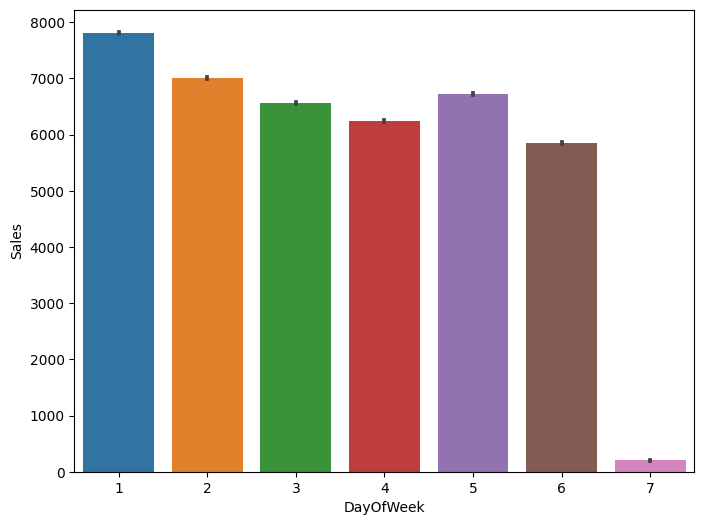

In [ ]:
# Chart - 2 visualization code
plt.rcParams['figure.figsize']=(8, 6)
sns.barplot(x=merged_df["DayOfWeek"],y=merged_df['Sales'])


In [ ]:
# Average weekly sale calculation for only days when store are open
weekly_sale=merged_df.groupby("DayOfWeek")["Sales","Open"].sum()
weekly_sale.rename(columns = {'Sales':'Total_Sales','Open':'Total_Open'}, inplace = True)   #Renaming column name
weekly_sale["Average_sales"]=(weekly_sale.Total_Sales/weekly_sale.Total_Open).round(2)      #Claculating Average
weekly_sale

<ipython-input-55-f2c89adf1d23>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  weekly_sale=merged_df.groupby("DayOfWeek")["Sales","Open"].sum()


Total_Sales  Total_Open  Average_sales
DayOfWeek                                        
1           1130203012      137560        8216.07
2           1020411930      143961        7088.11
3            954962863      141936        6728.12
4            911177709      134644        6767.31
5            980555941      138640        7072.68
6            846317735      144058        5874.84
7             29551433        3593        8224.72

<Axes: xlabel='Open', ylabel='Sales'>

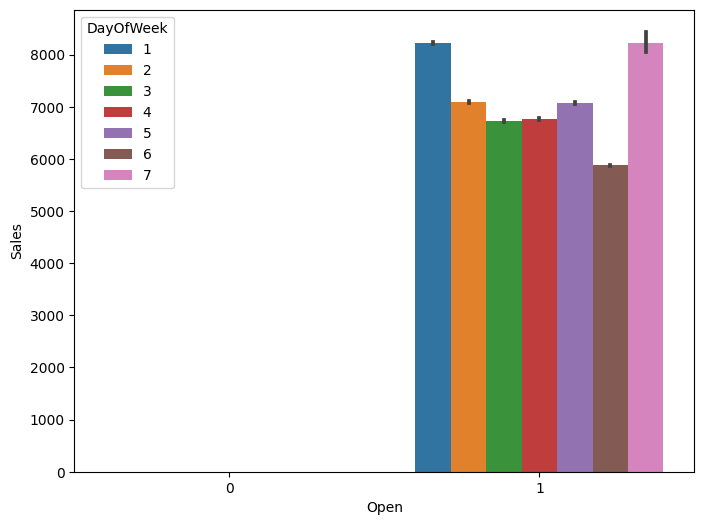

In [ ]:
plt.rcParams['figure.figsize']=(8, 6)
sns.barplot(x=merged_df["Open"],y=merged_df["Sales"],hue=merged_df["DayOfWeek"])

1. Why did you pick the specific chart?

Barplots allow for a quick visual comparison between different categories or groups. Each category is displayed as a separate bar, making it easy to compare the values associated with each category where length of the bars directly corresponds to the values being compared, making it easy to identify the largest or smallest values

2. What is/are the insight(s) found from the chart?

In first chart we see average sale according to the day of the week on 7th day which is sunday we see average is very low. It's clear that the number of shops open on Sundays were very less and hence low sales. In second chart we see average Sales for open days which shows actually sales are higher on sundays and also some shops were closed on weekdays as well.

3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can help to create a positive business impact by indicating that opening stores on Sundays can potentially lead to increased sales. It can also assist in determining when stores should be closed for refurbishment or holidays in order to minimise sales loss.

There are no insights that lead to negative growth. However, if the reason for the shops being closed on certain days is a lack of staff or other operational issues, it could potentially lead to negative growth if not addressed properly.

          Sales
Store          
262    20718.52
817    18108.14
562    17969.56
1114   17200.20
251    15814.09
842    15242.11
513    15129.94
788    14949.19
733    14933.29
383    14320.47
756    13706.77
335    13313.94
698    12953.58
523    12925.68
595    12499.98
586    12465.39
320    12346.30
380    11955.07
544    11670.60
1033   11539.56


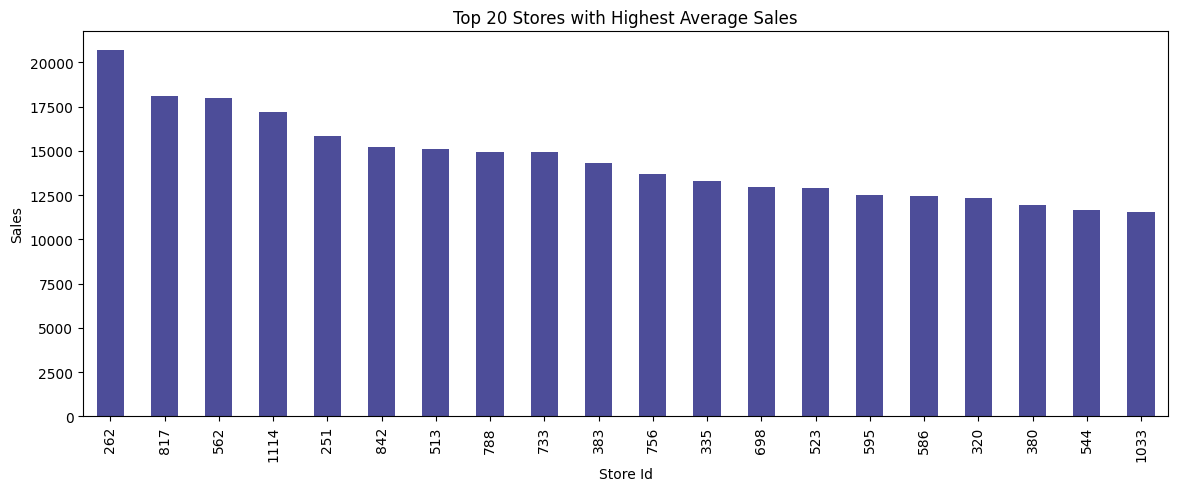

In [ ]:
# Chart - 3 visualization code
# top 20 stores with highest average sales
plt.rcParams['figure.figsize'] = (14,5)
top20stores=pd.DataFrame(merged_df.groupby('Store')['Sales'].mean().sort_values(ascending=False))[:20].round(2)
print(top20stores)

# Creating bar plot chart
top20stores['Sales'].plot(kind = 'bar', color =[0.3,0.3,0.6])
plt.ylabel('Sales')
plt.xlabel('Store Id')
plt.title('Top 20 Stores with Highest Average Sales')
plt.show()

1. Why did you pick the specific chart?

For Visulization of Top 20 Stores sale we use barplots that allow a quick visual comparison between different categories or groups

2. What is/are the insight(s) found from the chart?

From first Vizualization chart we find that average sale of one store is approx 5591/- but Top 20 store Sales lies between 11000/- to 20000/- Store 262 has the highest average sales of $20718/-

3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

so other stores should try implementing the model of Store Number 262 and other top-20 stores in daily operations or could also implement their assortment methods to witness increase in sales.

Chart - 4 Relationship between Store type, Assortment levels and Average Sales


       StoreType Assortment  Sales
508604         a          a   5951
761576         a          a      0
761578         a          c      0
761579         a          c      0
761580         a          a      0
761581         a          c      0
761582         a          c      0
761583         a          a      0
761584         a          a      0
401243         a          c   4471


<Axes: xlabel='StoreType', ylabel='Sales'>

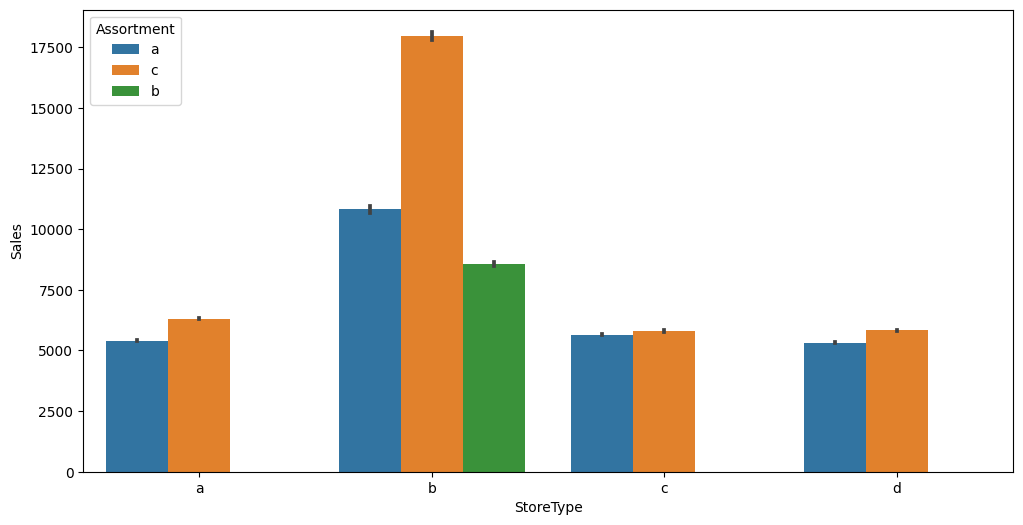

In [ ]:
# Chart - 4 Visualization code
# Let's check the relationship between store type, assortment levels and Average sales
plt.rcParams['figure.figsize'] = (12, 6)
Store_type=pd.DataFrame(merged_df,columns=['StoreType','Assortment','Sales'])
Store_type.sort_values("StoreType", ascending=True, inplace = True)
print(Store_type.head(10))
sns.barplot(x=Store_type["StoreType"],y=Store_type['Sales'],hue=Store_type["Assortment"])

1. Why did you pick the specific chart?

Bar plots are simple and effective way to visualize the relationship between categorical features and the target variable in a prediction model and they provide valuable information that can be used to guide the modeling process. Also here for visualising as per Assortment.

2. What is/are the insight(s) found from the chart?

The above bar plot shows that the store types a, c and d have only assortment level a and c. On the other hand the store type b has all the three kinds of assortment strategies, a reason why average sales were high for store type b stores.

3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights can help create a positive business impact by understanding the relationship between store types and assortment levels, businesses can make informed decisions on how to stock and market their products to better meet the needs and preferences of their target customers. For example, if store type b stores have higher average sales, businesses may consider increasing the number of stores with that store type and assortment level to capitalize on the potential for higher sales.

There are no insights that directly lead to negative growth in this case. However, businesses may face challenges if they are unable to stock the appropriate assortment levels in their stores due to supply chain issues or other factors.

Chart - 5 Total Sales vs Store Type

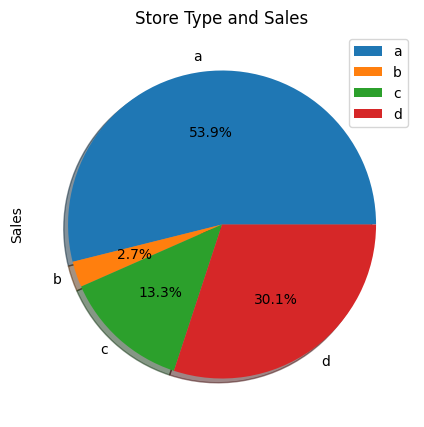

In [ ]:
# Chart - 5 visualization code
# Let's explore Store Type a bit and it's influence on sales
plt.rcParams['figure.figsize'] = (8, 5)
merged_df.groupby("StoreType")["Sales"].sum().plot.pie(title='Store Type and Sales', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()

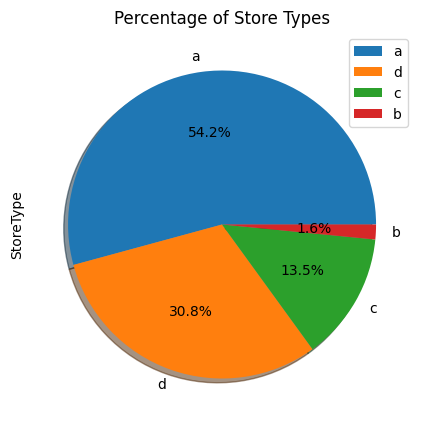

In [ ]:
# Store types in all of the dataset
plt.rcParams['figure.figsize'] = (8, 5)
merged_df["StoreType"].value_counts().plot.pie(title='Percentage of Store Types', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()

1. Why did you pick the specific chart?

Pie charts are used when the variable has a limited number of categories, and the goal is to show the proportion or percentage of observations that belong to each category. Pie charts are particularly useful when the number of categories is small, typically between 2 and 6, as they provide an easy-to-read representation of the distribution of the data.

2. What is/are the insight(s) found from the chart?

Earlier it was seen that the store type b had the highest sales on an average because the default estimation function to the barplot is mean.
But upon further exploration it can be clearly observed that the highest sales belonged to the store type a due to the high number of type a stores in our dataset.
Interesting insight to note is that store type b with highest average sales and per store revenue generation looks healthy and a reason for that would be all three kinds of assortment strategies involved which was seen earlier.
3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can help create a positive business impact as it provides valuable information about the sales and revenue generation of different store types and assortment strategies. This information can be used by the business to make informed decisions regarding their product offerings, marketing strategies, and store operations.

There are no signs that lead to negative growth.

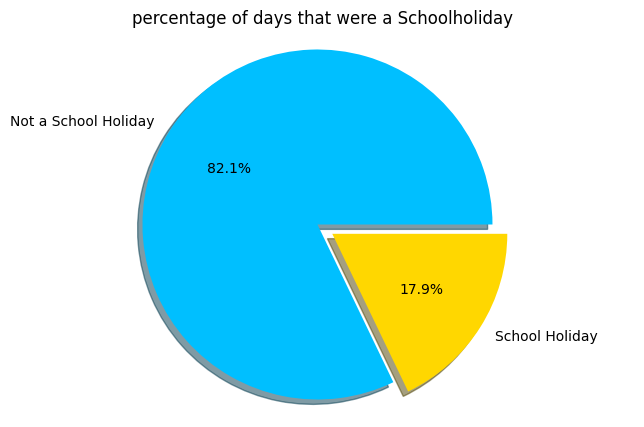

In [ ]:
# Chart - 6 visualization code
labels = 'Not a School Holiday' , 'School Holiday'
sizes = merged_df.SchoolHoliday.value_counts()
colors = ['deepskyBlue', 'gold']
plt.pie(sizes, explode=(0.1, 0.0), labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.title("percentage of days that were a Schoolholiday ")
plt.show()

1. Why did you pick the specific chart?

Pie charts can be visually appealing and engaging. The circular shape and the use of colors can make them visually striking, making it easier for viewers to understand and remember the information. we pick that chart to analyse the share of days that were school holidays.

2. What is/are the insight(s) found from the chart?
17.9% of the days are school holidays.

3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

Since 17.9% of the days are school holidays, Rossman stores could use this as an opportunity to target parents and kids as an audience and try to advertise children friendly promotions to increase footfall in the stores on these days.

<Axes: xlabel='Customers', ylabel='Sales'>

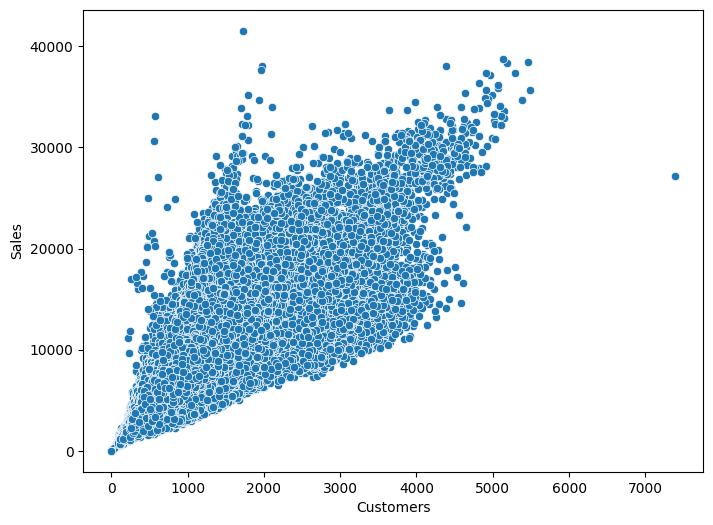

In [ ]:
# Chart - 7 visualization code
# Scatter plot of Customers and Sales
plt.rcParams['figure.figsize'] = (8, 6)
sns.scatterplot(x=merged_df['Customers'], y=merged_df['Sales'])

1. Why did you pick the specific chart?

Scatter plots are a powerful tool for visualizing the relationship between two variables and it represents individual data points as dots on a graph, making it easier to visualize the distribution and spread of the data. This can be helpful in identifying outliers or clusters within the data set. We are particularly using it for exploring the relationship between sales and customers.

By examining the pattern of the data points in a scatterplot, we can gain valuable insights into the relationship between the two variables and identify trends, patterns, or outliers that may be important for understanding the business.

2. What is/are the insight(s) found from the chart?
scatter plot points form an upward sloping pattern and suggests a positive correlation and indicating that as the number of customers increases the sales also tend to increase.there are also some outliers that can provide valuable insights into factors and may influence sales.

3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

This indicates that increasing customer footfall can lead to higher sales, and the business can focus on customer retention and acquisition strategies.

Presence of outliers in the scatter plot suggests that there may be some stores that are not performing well in terms of converting customers into sales. Identifying and addressing the reasons for low sales in these stores can help prevent negative growth.

Chart - 8 Promotion Impact: Analyzing Sales Performance

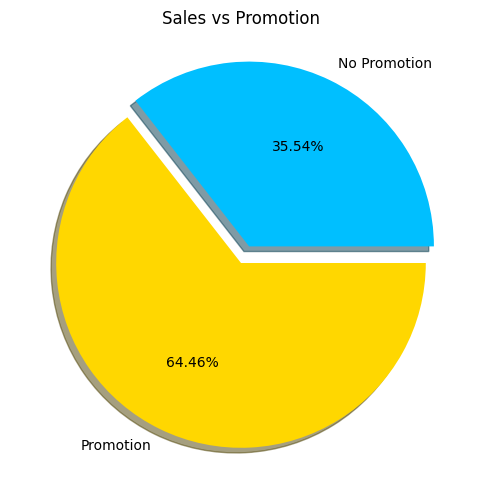

In [ ]:
# Chart - 8 visualization code

plt.title("Sales vs Promotion")
labels = 'No Promotion','Promotion'
sizes = merged_df.groupby("Promo")['Sales'].mean()
colors = ['deepskyBlue', 'gold']
plt.pie(sizes, explode=(0.1, 0.0), labels=labels, colors=colors, autopct='%1.2f%%', shadow=True)
plt.show()

1. Why did you pick the specific chart?

We choose Pie chart because these are effective at illustrating proportions or percentages of a whole. They divide a circle into slices, with each slice representing a different category or component. The size of each slice corresponds to the proportion it represents.

2. What is/are the insight(s) found from the chart?
When promotion are applied on stores sales average is recorded 64.46% while without promotion sales average is 35.54% that has nearly difference of twice.

3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

Comparing the 64.46% of sales with promotion to the 35.54% without promotion indicates that promotions have a noticeable impact on sales. It implies that customers are more likely to make purchases when incentivized by promotions, as evidenced by the higher sales percentage associated with promotions.

Chart - 9 Customer Response to Promotional Campaigns

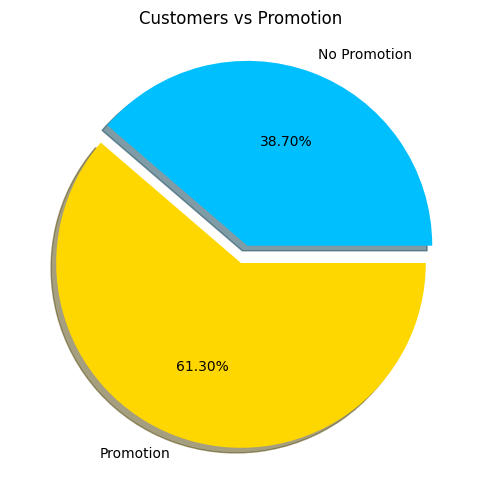

In [ ]:
# Chart - 9 visualization code

plt.title("Customers vs Promotion")
labels = 'No Promotion','Promotion'
sizes = merged_df.groupby("Promo")['Customers'].mean()
colors = ['deepskyBlue', 'gold']
plt.pie(sizes, explode=(0.1, 0.0), labels=labels, colors=colors, autopct='%1.2f%%', shadow=True)
plt.show()

1. Why did you pick the specific chart?

We choose Pie chart because these are effective at illustrating proportions or percentages of a whole. They divide a circle into slices, with each slice representing a different category or component. The size of each slice corresponds to the proportion it represents.

2. What is/are the insight(s) found from the chart?
When promotion are applied on stores customers average is recorded 61.30% while without promotion Customer average is 38.70%.

3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

The increase in customer average from 38.70% to 61.30% indicates that promotions play a crucial role in attracting and engaging customers. The higher customer average suggests that promotions are successful in driving customer participation and increasing sales.


Chart - 10 Sales and Customer Trends Across the Months: Analyzing Monthly Performance

In [ ]:

# average of sales and customer for month of the year in whole dataset
monthly_data=merged_df.groupby("Month")[["Sales","Customers"]].mean()
monthly_data

Sales   Customers
Month                         
1      5465.395529  601.617172
2      5645.253150  626.715129
3      5784.578871  629.401958
4      5738.866916  630.612945
5      5489.639973  601.991263
6      5760.964375  624.794091
7      6064.915711  656.629781
8      5693.016554  642.496979
9      5570.246033  634.438699
10     5537.037419  631.095987
11     6008.111821  654.147967
12     6826.611377  703.067899

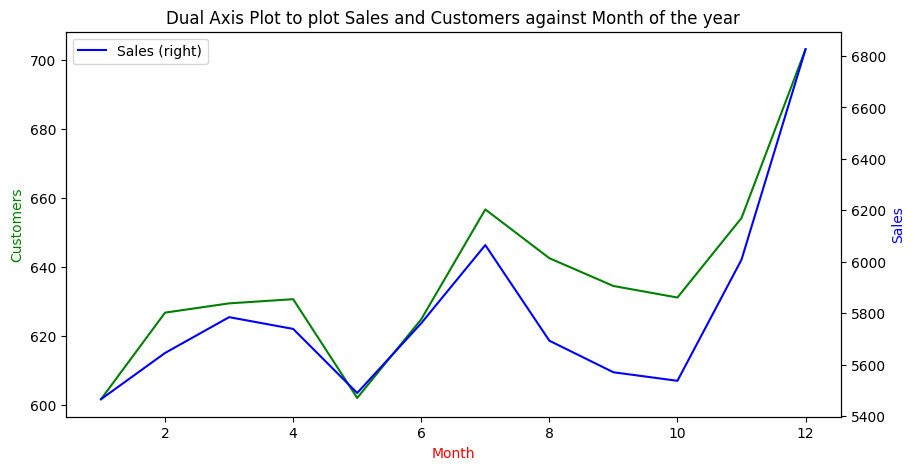

In [ ]:
# Chart - 10 visualization code

# plotting figures by creating axes object using subplots() function
fig, ax = plt.subplots(figsize = (10, 5))
plt.title('Dual Axis Plot to plot Sales and Customers against Month of the year')

ax=monthly_data["Customers"].plot(kind= "line", color = 'green')
ax2=monthly_data["Sales"].plot(kind= "line", secondary_y = True, color = 'blue',ax=ax)

# giving labels to the axises
ax.set_xlabel('Month', color = 'r')
ax.set_ylabel('Customers', color = 'g')
plt.legend()
# secondary y-axis label
ax2.set_ylabel('Sales', color = 'b')

plt.legend()
plt.show()

1. Why did you pick the specific chart?

A dual-axis line plot allows you to visualize and compare two variables simultaneously. it is useful to understand the relationship or correlation between two variables and observe their trends over time or another shared dimension.

We use dual-axis line plot to compare the change in monthly mean of Sales and Customers in overall dataset

2. What is/are the insight(s) found from the chart?

Sales and Customers are closely related over months and have Parallel movements.As one variable increases or decreases, the other variable will exhibit a similar trend. This indicates a positive correlation between the two variables.

3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

This chart reveals a lot of information about the sales of Rossman Stores, Maximum sales is done at the end of the year, which is a festival season. Also, number of customers in the stores also increases at that time.

We can clearly see that Sales and Customers is closely related.

Chart - 11 Relationship Between Competition Distance and Sales

<Axes: xlabel='CompetitionDistance', ylabel='Sales'>

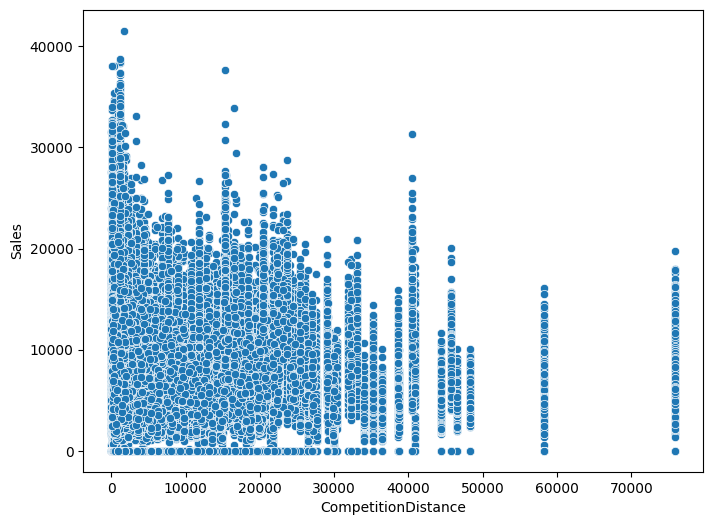

In [ ]:

# Chart - 11 visualization code
# Scatter plot of Competition Distance and Sales
plt.rcParams['figure.figsize'] = (8, 6)
sns.scatterplot(x=merged_df['CompetitionDistance'], y=merged_df['Sales'])

1. Why did you pick the specific chart?

A scatter plot allows you to assess the relationship between two variables and determine if there is any correlation between them. By plotting competition distance on the x-axis and sales on the y-axis, you can visually inspect if there is any pattern or trend between the two variables.

2. What is/are the insight(s) found from the chart?

From the above scatter plot it can be observed that mostly the competitor stores weren't that far from each other and the stores densely located near each other saw more sales.

3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

Insight that stores located near each other saw more sales can be used to create a positive business impact. This information can be used to open new stores in areas with high sales potential, where competitors are not located too far away.

However, this might also lead to negative growth for existing stores in highly competitive areas as they may lose some of their customer base to the new stores. Therefore, it is important to carefully analyze the market and competition before opening new stores.



Chart - 12 Marking Milestones: Sales and Competition Since [Year]

Text(0.5, 1.0, 'Plot between Sales and Competition Open Since year')

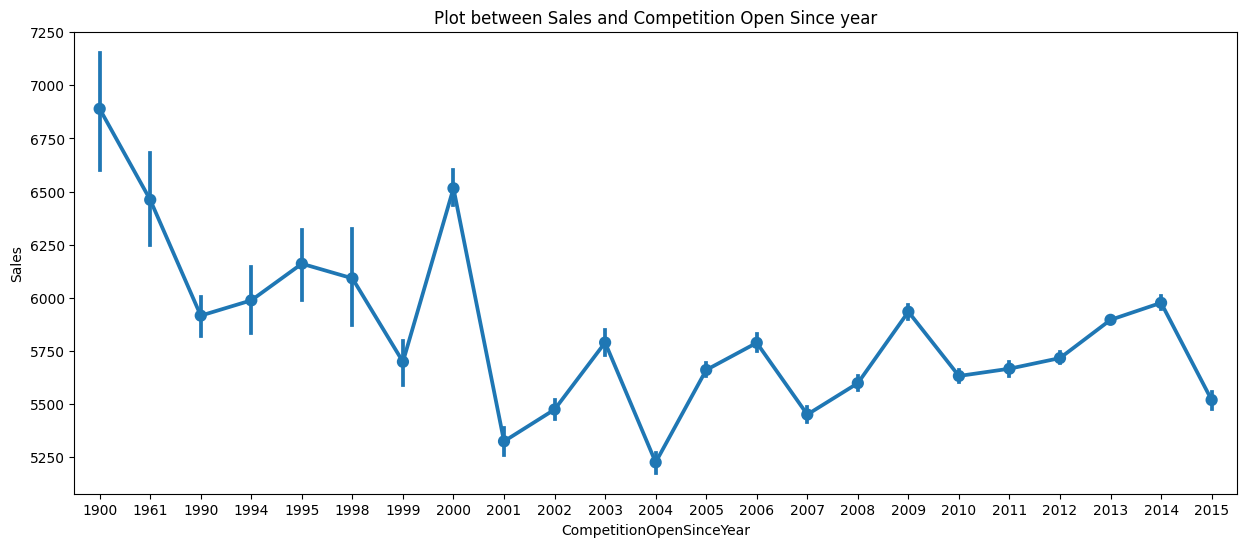

In [ ]:

# Chart - 12 visualization code
plt.figure(figsize=(15,6))
sns.pointplot(x= 'CompetitionOpenSinceYear', y= 'Sales', data=merged_df)
plt.title('Plot between Sales and Competition Open Since year')



1. Why did you pick the specific chart?

Point plots are effective for exploring the relationships between two variables. By plotting one variable on the x-axis and another on the y-axis, you can observe how the data points are distributed and detect any correlations or trends between the variables.

2. What is/are the insight(s) found from the chart?

From the above pointplot chart we can tell that Sales are high during the year 1900, as there are very few store were operated of Rossmann so there is less competition and sales are high. But as year pass on number of stores increased that means competition also increased and this leads to decline in the sales.

3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

This analysis suggests a negative correlation between the number of stores (representing competition) and sales. As competition intensifies with more stores entering the market, it can impact sales performance. This insight highlights the importance of considering competition dynamics when analyzing sales trends.

Chart - 13 Promotions by Weekday: Percentage Comparison

In [ ]:
#creating daframe having grouped data of promo and dayofweek column
promo_totals=(merged_df[merged_df["Promo"]==0].groupby("DayOfWeek").size()*100/merged_df.groupby("DayOfWeek").size()).sort_values().to_frame()
promo_totals.rename(columns={0: "Promo not Applied"},inplace=True)
promo_totals["Promo Applied"]=100-promo_totals["Promo not Applied"]
promo_totals

Promo not Applied  Promo Applied
DayOfWeek                                  
1                  46.272369      53.727631
2                  46.740444      53.259556
3                  46.740809      53.259191
4                  46.806541      53.193459
5                  46.806541      53.193459
6                 100.000000       0.000000
7                 100.000000       0.000000

Text(0.5, 0, 'Promo Percentage')

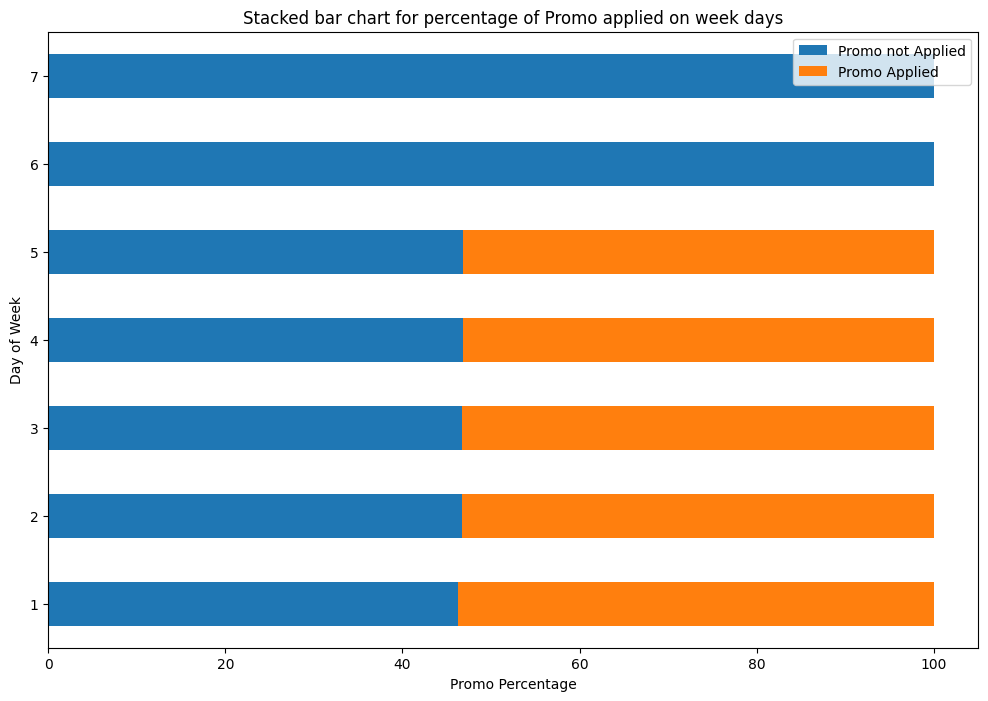

In [ ]:

# Chart - 13 visualization code

fig, ax= plt.subplots(figsize=(12,8))
promo_totals.plot(kind="barh",stacked=True,ax=ax)
plt.title("Stacked bar chart for percentage of Promo applied on week days")
plt.ylabel("Day of Week")
plt.xlabel("Promo Percentage")

1. Why did you pick the specific chart?

I pick this chart to show the ratio of days on each week of day when promo was applied.Barh charts are particularly useful when you want to rank categories based on their values. The longer the bar, the higher the value it represents, allowing for quick identification of the highest or lowest values.

2. What is/are the insight(s) found from the chart?

We found that on Saturday and Sunday (Day 6,7) promotion has never been applied.

3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

Promo is equally applied on other days except Saturday and Sunday. As we saw in 2nd chart visulization saturday and sunday making almost equal sale as compaired to other days without promotion. So promotion should be applied on Saturday and Sunday to increase sales and maximize the profit.

Chart - 14 - Correlation Heatmap

<ipython-input-72-7362307fa3df>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merged_df.corr(),annot= True,fmt=".2f",cmap=plt.cm.CMRmap,square=True,linewidth=0.5)


Text(0.5, 1.0, 'Correlation Heatmap for Rossman Stores and Sales Data')

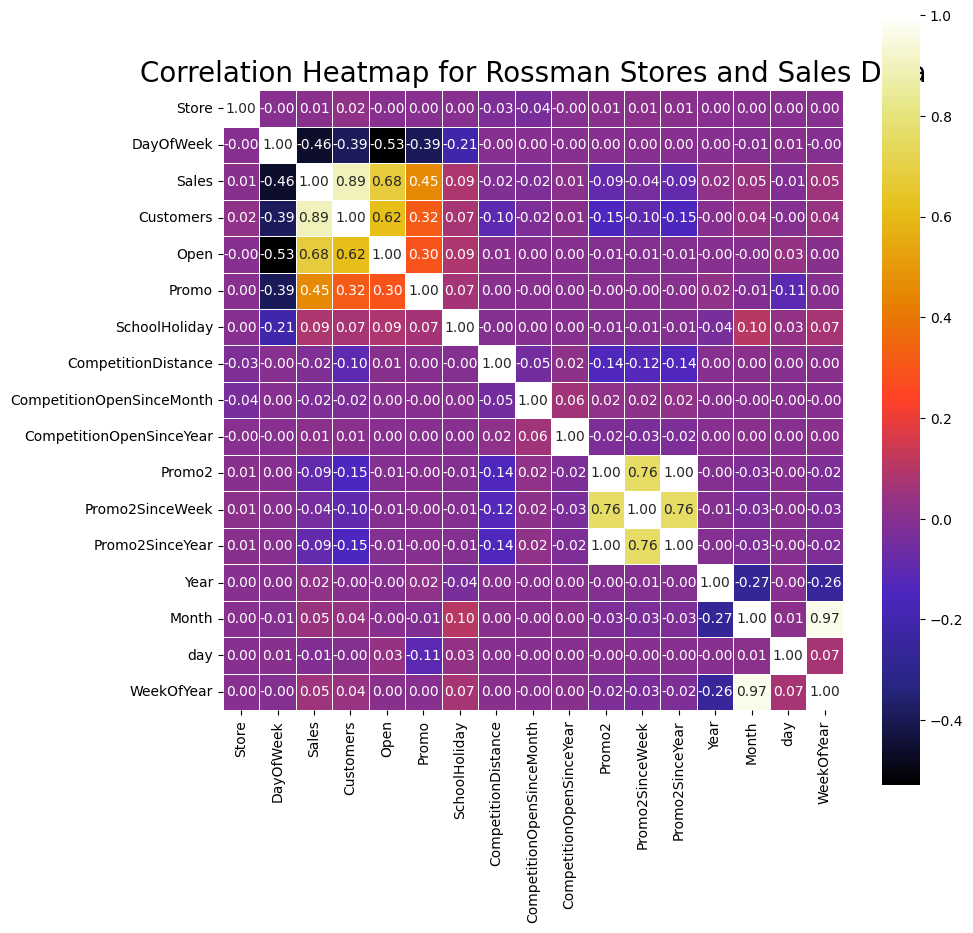

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize = (10,10))
sns.heatmap(merged_df.corr(),annot= True,fmt=".2f",cmap=plt.cm.CMRmap,square=True,linewidth=0.5)
plt.title('Correlation Heatmap for Rossman Stores and Sales Data', size=20)


1. Why did you pick the specific chart?
To check for correlation among the features visually. Each cell in the heatmap represents the correlation between two variables. In our case if two variables have a positive correlation, the heatmap will show a lighter color and if two variables have a negative correlation, the heatmap will show a darker color.

2. What is/are the insight(s) found from the chart?
We observe that Sales is positively Correlated with Customers. Also, Sales is highly Correlated with Promo also, showing how promo influences Sales to a high extent.

<Figure size 2000x500 with 0 Axes>

<Figure size 800x600 with 0 Axes>

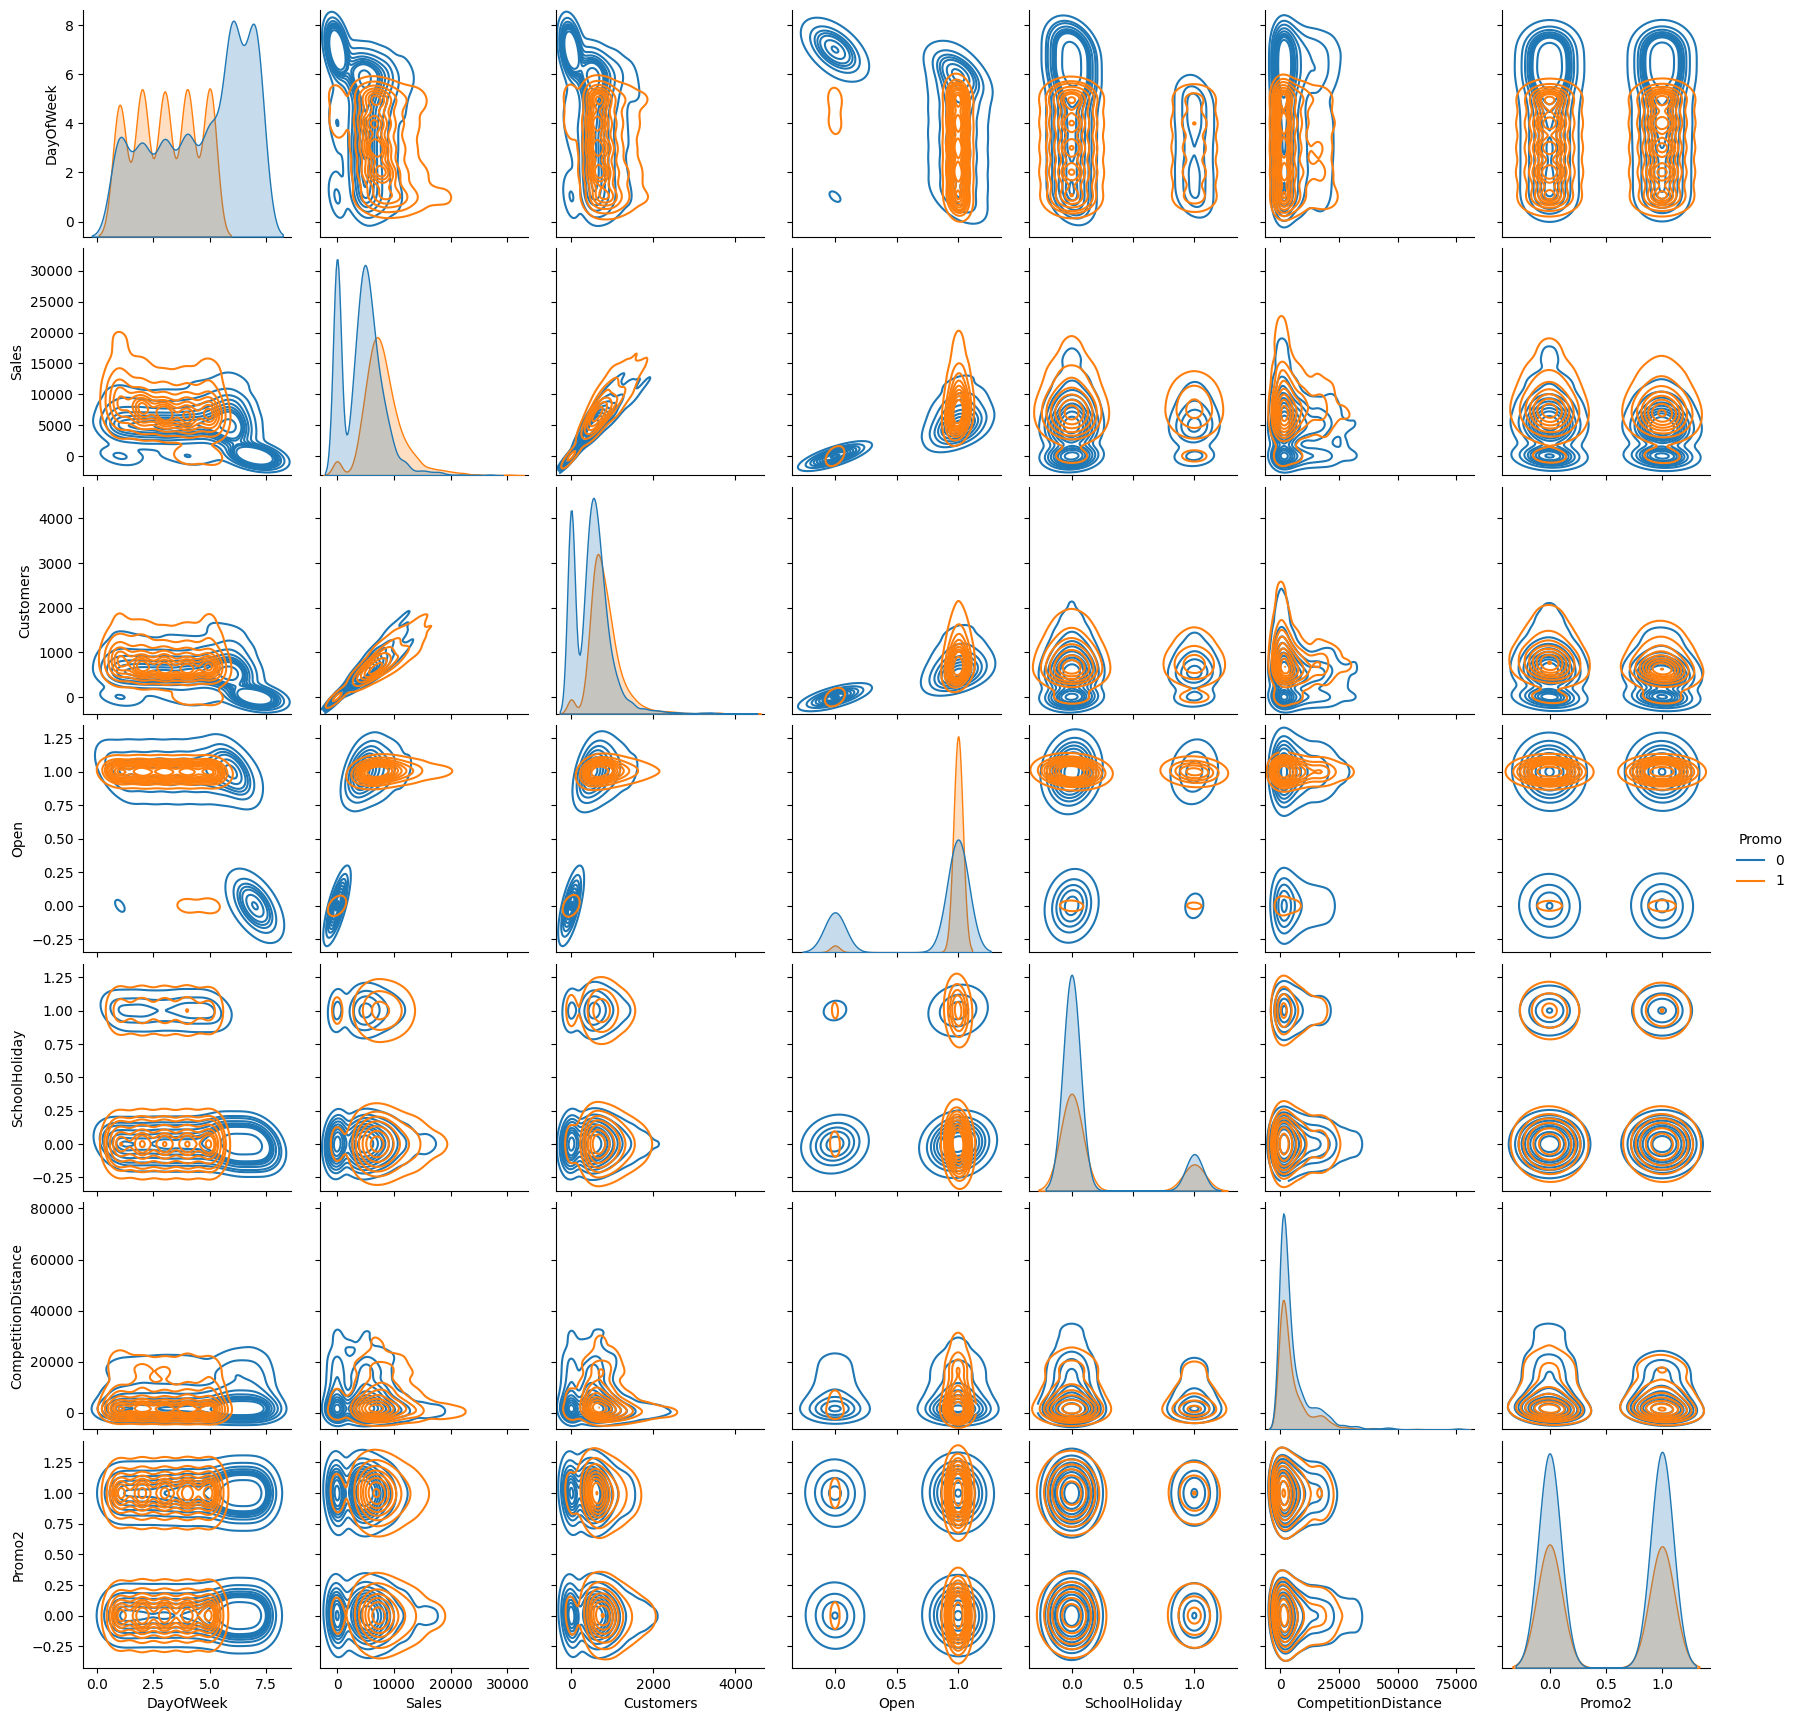

In [ ]:
# Pair Plot visualization code

# reducing columns and rows for analysis as compution time is high.
plt.figure(figsize = (20,5))

sub_df = merged_df.sample(n=5000)[['DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance','Promo2']]
plt.figure()
sns.pairplot(sub_df, hue="Promo", kind="kde", diag_kind="kde")

1. Why did you pick the specific chart?
A pair plot chart enables you to visualize the pairwise relationships between multiple variables in a single plot. Each combination of variables is represented by a scatter plot, allowing you to quickly identify potential associations or trends between different pairs of variables.

By plotting the variables in a pairwise manner, a pair plot chart allows you to assess the strength and direction of the correlations between variables

2. What is/are the insight(s) found from the chart?
Since most of the columns are categorical, a scatter plot in pair plot will not reveal much information. However we can still confirm from the pair plot using KDE plot that Zero Sales is Concentrated around Sunday( Day 7) and Open column is zero around Day 7, implying closed store on a Sunday is causing zero sales around Day 7.

Also with promo=1, the orange line are at the higher end with implying more Sales

# ***5. Hypothesis Testing***

Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Statement 1: The positive effect of promotion on sales is observable.

**Hypothetical Statement - 1**
1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null hypothesis**: “Promo” and “Sales” are independent to each other.

**Alternative hypothesis**: “Promo” and “Sales” are dependent to each other.

2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
#importing library for z test
from statsmodels.stats import weightstats as stests

df_promo_1=merged_df[merged_df["Promo"]==1]["Sales"]
df_promo_0=merged_df[merged_df["Promo"]==0]["Sales"]

#applying z-test
ztest ,probability_value = stests.ztest(df_promo_1, df_promo_0,value=0)
print("Z statistic=",ztest)
print("P- value= ",float(probability_value))

#two tailed test
if probability_value<0.025 or probability_value>0.950:
  print("Null hypothesis rejected , Alternative hypothesis accepted")
else:
  print("Null hypothesis accepted")

Z statistic= 511.54718673163774
P- value=  0.0
Null hypothesis rejected , Alternative hypothesis accepted


**Which statistical test have you done to obtain P-Value?**

We have done a Z-test to obtain a P- value

**Why did you choose the specific statistical test?**

We have choosen Z- test here to compare mean of sales when promo was applied and when promo was not applied. Null hypothesis is that promo and sales are independent implies that difference of mean will be in the 95% confidence range. If the difference of mean is larger than than the 95% confidence interval then promotion application is influencing the mean of sales and hence the sales also.

Seeing the P- value , and applying two tailed test, we can reject our null hypothesis.

**Hypothetical Statement - 2**

Statement 2:
 It is clear that most of the stores remain closed during State and School Holidays. But it is important to note that more stores were open on School Holidays than on State Holidays and hence on school holidays stores had more sales than State Holidays.

1. State Your research hypothesis as a null hypothesis and alternate hypothesis.
**Null hypothesis**: There is no significant difference.

**Alternative Hypothesis**: Sales are significantly higher for Stores that remain open during Holidays compared to those that remain closed.

2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Performing t-test for Stores that remain open and closed during Holidays
open_holiday_sales = merged_df[(merged_df['StateHoliday'] != 0) | (merged_df['SchoolHoliday'] != 0)]['Sales']
closed_holiday_sales = merged_df[(merged_df['StateHoliday'] == 0) & (merged_df['SchoolHoliday'] == 0)]['Sales']
t, p_value = ttest_ind(open_holiday_sales, closed_holiday_sales, equal_var=False)


In [ ]:
# Check if p-value is less than alpha
alpha = 0.05
print('p_value=',p_value)
if p_value < alpha:
    print("Null hypothesis rejected , Alternative hypothesis accepted \n Sales are significantly higher for Stores that remain open during Holidays compared to those that remain closed.")
else:
    print("Null hypothesis accepted \n There is no significant difference in Sales between Stores that remain open during Holidays and those that remain closed.")


p_value= 1.000336914612847e-271
Null hypothesis rejected , Alternative hypothesis accepted 
 Sales are significantly higher for Stores that remain open during Holidays compared to those that remain closed.


**Which statistical test have you done to obtain P-Value?**

We have perform ttest to obtain P value.

**Why did you choose the specific statistical test?**

The t-test is a statistical test used to determine if there is a significant difference between the means of two groups or conditions. we use t test to determine the difference in Sales between Stores that remain open during Holidays and those that remain closed.

Hypothetical Statement - 3


Most stores have competition distance within the range of 0 to 10 kms and had more sales than stores far away.

1. State Your research hypothesis as a null hypothesis and alternate hypothesis.
**Null hypothesis**:There is no significant difference in sales between stores with competition distance less than or equal to 10 kms and stores with competition distance greater than 10 kms.

**Alternative Hypothesis**:Stores with competition distance less than or equal to 10 kms have significantly higher sales compared to stores with competition distance greater than 10 kms.

In [ ]:

# Perform Statistical Test to obtain P-Value
# Separating data for stores with competition distance within 10 kms and beyond 10 kms
within_10km = merged_df[merged_df['CompetitionDistance'] <= 10000]['Sales']
beyond_10km = merged_df[merged_df['CompetitionDistance'] > 10000]['Sales']


# Performing t-test to compare the mean sales of both groups
t_statistic, p_value = ttest_ind(within_10km, beyond_10km, equal_var=False)

print("T-Statistic: ", t_statistic)
print("P-Value: ", p_value)

T-Statistic:  10.866009690996798
P-Value:  1.6968876274670157e-27


In [ ]:
# Comparing the p-value with the significance level (0.05) to determine the statistical significance
if p_value < 0.05:
    print("Null hypothesis rejected , Alternative hypothesis accepted \n The mean sales of stores within 10 kms and beyond 10 kms of competition distance are statistically different.")
else:
    print("Null hypothesis accepted \n There is no significant difference in the mean sales of stores within 10 kms and beyond 10 kms of competition distance.")


Null hypothesis rejected , Alternative hypothesis accepted 
 The mean sales of stores within 10 kms and beyond 10 kms of competition distance are statistically different.


**Which statistical test have you done to obtain P-Value?**

We have perform ttest to obtain P value.

**Why did you choose the specific statistical test?**

The t-test is designed to compare independent samples, meaning that the observations in one group or condition are not related or dependent on the observations in the other group or condition. We do T-test to find that wheather compition distance within 10km or outside 10 km will increase the sales or not.

# ***6. Feature Engineering & Data Pre-processing***

1. Handling Missing Values

In [ ]:

# Handling Missing Values & Missing Value Imputation
merged_df.isna().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
Year                         0
Month                        0
day                          0
WeekOfYear                   0
dtype: int64

What all missing value imputation techniques have you used and why did you use those techniques?

We don't have any missing values. We already removed all missing/null/duplicate values in Data Wrangling section.

We checked all missing/null values of various columns and replaced with median and mode.

2. Handling Outliers

<ipython-input-80-a250a2f18d67>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1.Sales);


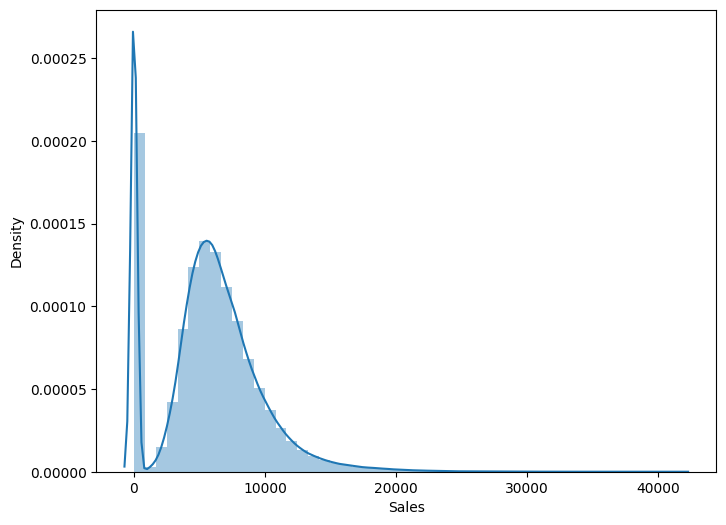

In [ ]:
# Handling Outliers & Outlier treatments
df1=merged_df.copy()
sns.distplot(df1.Sales);
# will be removing rows with zero sales since it has become a bimodal distribution with one mode at zero


<ipython-input-81-ba0441a58f82>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1.Sales);


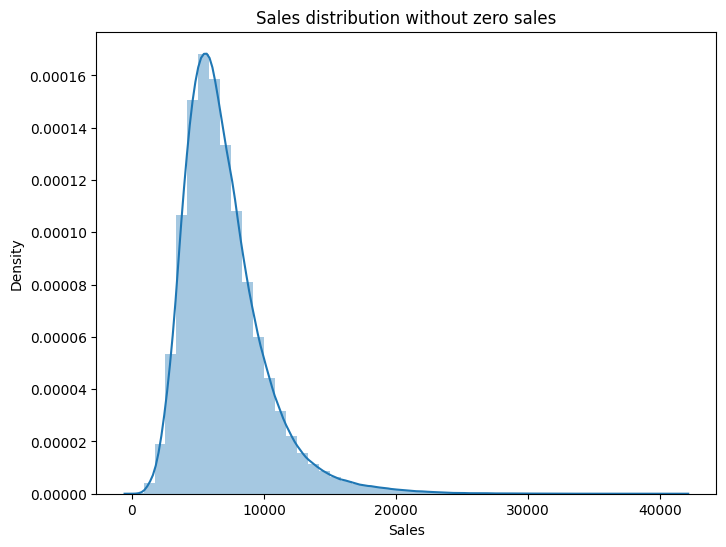

In [ ]:
#removing zero sales
df1=df1[df1['Sales']!=0]
sns.distplot(df1.Sales);
plt.title("Sales distribution without zero sales");
# right skewed distribution, we will apply log transformation on sales column

Right skewed distribution, we will apply log transformation on sales column

<ipython-input-82-6e67a77d5d17>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1.lnSales);


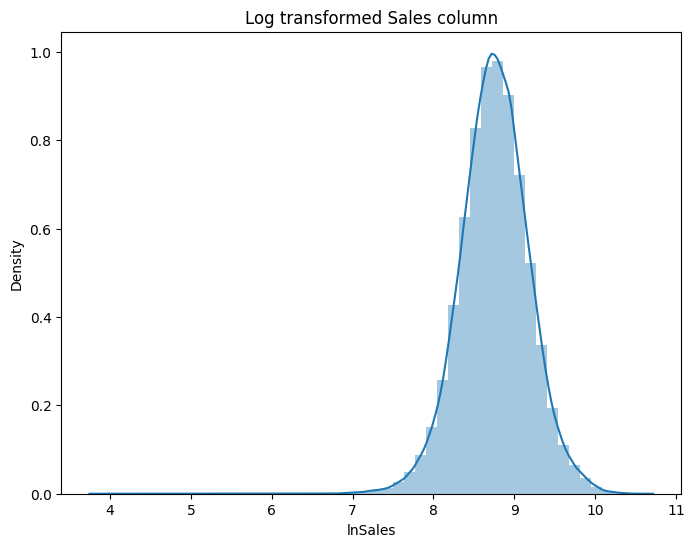

In [ ]:
#log transformation of sales column
df1["lnSales"]=np.log(df1["Sales"])
sns.distplot(df1.lnSales);
plt.title("Log transformed Sales column" );

In [ ]:
#Descriptive Statistics of lnSales
df1["lnSales"].describe()

count    844338.000000
mean          8.757564
std           0.425278
min           3.828641
25%           8.488588
50%           8.759198
75%           9.031214
max          10.634677
Name: lnSales, dtype: float64

10.05

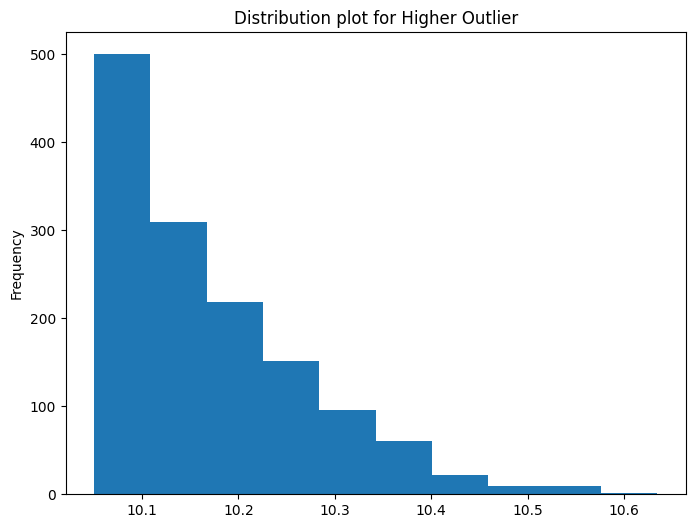

In [ ]:
# we will be treating data outside 3 standard deviation as outlier
sales_mean= round(df1["lnSales"].mean(),2)
sales_std=round(df1["lnSales"].std(),2)

#defining upper bound for outliers
sls_uprbnd=sales_mean+3*sales_std
df1[df1["lnSales"]>sls_uprbnd].shape
df1[df1["lnSales"]>sls_uprbnd].shape[0]/df1["lnSales"].shape[0]
df1[df1["lnSales"]>sls_uprbnd]["lnSales"].plot(kind="hist")
plt.title("Distribution plot for Higher Outlier")
sls_uprbnd

Since for a normal distribution, z-value=+-3 constitutes 99.7% of the values, we are using outside z=+-3 as outliers.

In [ ]:
# checking how many times promotion was going on when stores had abnormally high sales
df1[df1["lnSales"]>sls_uprbnd].Promo.value_counts()

1    994
0    382
Name: Promo, dtype: int64

This implies that promotion does have a impact on sales

In [ ]:

# checking for reasons of abnormally high sales when no promotion was going on
temp=df1[(df1["lnSales"]>sls_uprbnd)]
temp=temp[temp["Promo"]!=1]
for c in list(temp.columns):
 if c in ["DayOfWeek","StoreType","Month"]:
  print(f" Value counts of {c}")
  print(temp[c].value_counts().head(10))

 Value counts of DayOfWeek
7    128
6     86
1     79
5     31
2     26
4     19
3     13
Name: DayOfWeek, dtype: int64
 Value counts of StoreType
a    176
b    153
c     28
d     25
Name: StoreType, dtype: int64


Upon Analysing the value counts for sales> sls_uprbnd and promotion not applied, we notice the following points:

High sales happened mostly in the case of December, in store type 'a' or 'b'
Also it happened most of the times when the Day of the week was Saturday(6),Sunday(7) or Monday(1)
So we will not be doing anything with the outliers , since they do not occur randomly.

Now we will be checking for the outliers of Competition Distance

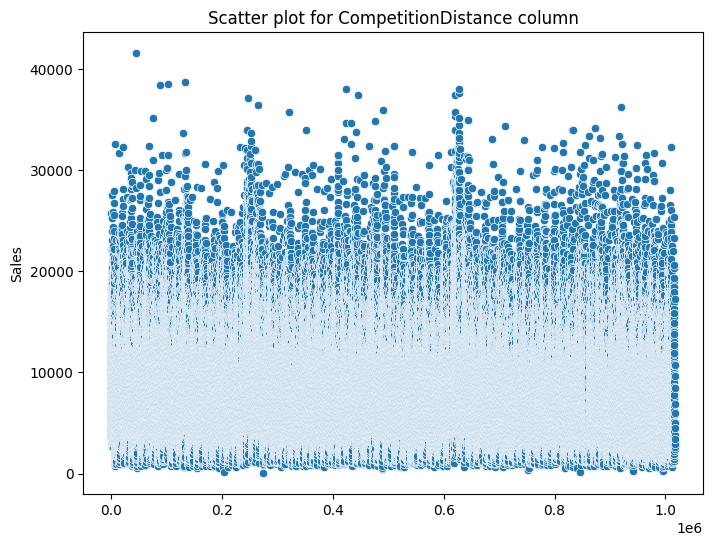

In [ ]:
#scatter plot for to check the outliers in CompetitionDistance column
sns.scatterplot(df1["Sales"])
plt.title("Scatter plot for CompetitionDistance column");

In [ ]:
#Descriptive statistics for Competition Distance
df1["CompetitionDistance"].describe()

count    844338.000000
mean       5450.044852
std        7801.082007
min          20.000000
25%         710.000000
50%        2325.000000
75%        6880.000000
max       75860.000000
Name: CompetitionDistance, dtype: float64

Checking how sales is distributed among the quantiles of Competition Distance

In [ ]:
#calculating total sales
totalsales=df1["Sales"].sum()
# sales between subsequent quantiles
sumsales_a=round(df1[df1["CompetitionDistance"]<710].Sales.sum()/totalsales,2)
sumsales_b=round(df1[(df1["CompetitionDistance"]<2325) & (df1["CompetitionDistance"]>=710) ].Sales.sum()/totalsales,2)
sumsales_c=round(df1[(df1["CompetitionDistance"]<6880) & (df1["CompetitionDistance"]>=2325)].Sales.sum()/totalsales,2)
sumsales_d=round(df1[df1["CompetitionDistance"]>=6880].Sales.sum()/totalsales,2)

print("Proportion of sales distributed among Competiton Distance quantiles:")
[sumsales_a,sumsales_b,sumsales_c,sumsales_d]
# we can see that sales get evenly divided when we divide the competition distance into 4 parts, based on 1st,2nd and 3rd quantile values of Competition Distance.


Proportion of sales distributed among Competiton Distance quantiles:


[0.26, 0.25, 0.24, 0.25]

We will be encoding Competitiondistance as 1,2,3,4.

1 signifying that the competition is closely located and 4 signifying that the competition is far away

From the Scatter plot also we can notice that sales density decreased (plot became more sparse) as Competition distance increased.

3. Categorical Encoding

In [ ]:
# Encode your categorical columns
# encoding competition distance as 1,2,3,4 based on the values of Quantile
def dist_code(x):
  if(x<710):
    return(1)
  elif(x>=710 and x<2325):
    return(2)
  elif(x>=2325 and x<6880):
    return(3)
  elif(x>=6880):
    return(4)
df1["CompetitionDistanceCode"]=list(map(dist_code,df1["CompetitionDistance"]))

# 0 - not a state holiday; 1- is on a state holiday
df1['StateHoliday'] = df1.StateHoliday.map({'0':0, 'a':1 ,'b' : 1,'c': 1}).fillna(0)

print(df1["CompetitionDistanceCode"].value_counts())

2    211941
4    211641
3    211595
1    209161
Name: CompetitionDistanceCode, dtype: int64


In [ ]:
#value counts of State holiday
df1["StateHoliday"].value_counts()

0.0    843428
1.0       910
Name: StateHoliday, dtype: int64

What all categorical encoding techniques have you used & why did you use those techniques?

1. We have categorically encoded Competition distance and reduced the categories in State Holiday column

2. We will be dealing with ordinal categories by categorically encoding them using pd.dummies a little ahead in the notebook.

4. Feature Manipulation & Selection

1. Feature Manipulation

Creating a new feature Promo2Open to Calculate the total time in months that the store has been using continuous promotions

In [ ]:
#creating a new feature Promo2Open to Calculate the total time in months that the store has been using continuous promotions
df1["Date"]=pd.to_datetime(df1["Date"])
df1["Year"]=df1["Date"].dt.year              # seperating year from date column to new column year
df1["Month"]=df1["Date"].dt.month            # seperating month from date column to new column month
df1["WeekOfYear"]=df1["Date"].dt.weekofyear  # seperating Week of year from date column to new column weekofyear
df1['Promo2Open'] = (df1['Year'] - df1['Promo2SinceYear'])*12 + abs(df1['WeekOfYear'] - df1['Promo2SinceWeek'])*(7/(365/12))
df1["PromoInterval"].unique()

<ipython-input-99-8220b4c8432d>:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df1["WeekOfYear"]=df1["Date"].dt.weekofyear  # seperating Week of year from date column to new column weekofyear


array([0, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

In [ ]:

# Since unique values in Promo Interval were only 4, we used map function to map the values to a list containing the corresponding month number
df1["PromoInterval"]=df1["PromoInterval"].map({'Jan,Apr,Jul,Oct':[1,4,7,10],'Feb,May,Aug,Nov' :[2,5,8,11] ,'Mar,Jun,Sept,Dec' :[3,6,9,12]}).fillna(0)

df1["PromoInterval"]

0                      0
1          [1, 4, 7, 10]
2          [1, 4, 7, 10]
3                      0
4                      0
               ...      
1016776                0
1016827                0
1016863    [1, 4, 7, 10]
1017042                0
1017190                0
Name: PromoInterval, Length: 844338, dtype: object

Creating a new feature Promo2_active which will record if Promo2 was running in that month by checking promointerval column and Promo2 and the month of the sales

In [ ]:
#creating a new feature Promo2_active which will record if Promo2 was running in that month by checking promointerval column and Promo2 and the month of the sales
def pr2_run(k):
  if k["PromoInterval"]==0:
    return 0
  elif k["Month"]  in k["PromoInterval"] and k["Promo2"]==1:
    return 1
  else:
    return 0

df1["Promo2_active"]=df1.apply(pr2_run, axis=1)

In [ ]:
# checking value counts for Promo2_active
df1["Promo2_active"].value_counts()

0    699125
1    145213
Name: Promo2_active, dtype: int64

Creating Competitionopensincemonths to capture the total duration in months instead of weeks and year

In [ ]:
#Creating Competitionopensincemonths to capture the total duration in months instead of weeks and year

df1['Competitionopensincemonths'] = (df1['Year'] - df1['CompetitionOpenSinceYear'])*12 + abs(df1['Month'] - df1['CompetitionOpenSinceMonth'])


2. Feature Selection

In [ ]:
# columns to be dropped
drop_feature=['Sales', 'Customers', 'Open','CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month']
df1.drop(columns=drop_feature, inplace=True)

In [ ]:
#checking columns after dropping
(df1.columns)

Index(['Store', 'DayOfWeek', 'Date', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'StoreType', 'Assortment', 'day', 'WeekOfYear', 'lnSales',
       'CompetitionDistanceCode', 'Promo2Open', 'Promo2_active',
       'Competitionopensincemonths'],
      dtype='object')

What all feature selection methods have you used and why?

We have combined feature that were correlated with each other.

Eg-

* 'Promo2', 'Promo2SinceWeek','Promo2SinceYear', 'PromoInterval' were highly correlated and thus we combined them into two new features
* 'CompetitionOpenSinceMonth','CompetitionOpenSinceYear' were also correlated, so we combined them into a new feature
* We distributed Competition Distance into Quantiles and formed a new categorical variable after observing similar sales distribution.

Which all features you found important and why?

We found out that promo is highly correlated with sales and can be a good indicator of high sales, and promo2open and promo2 active will aslo be helpful in deciding the sales considering the fact that continuous promotions will always attract customers.

5. Data Transformation

Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data
# Encoding Nominal Categorical Columns
df_new=pd.get_dummies(df1, dtype=int, drop_first=True)
df_new.head()

Store  DayOfWeek       Date  Promo  StateHoliday  SchoolHoliday  day  \
0      1          5 2015-07-31      1           0.0              1   31   
1      2          5 2015-07-31      1           0.0              1   31   
2      3          5 2015-07-31      1           0.0              1   31   
3      4          5 2015-07-31      1           0.0              1   31   
4      5          5 2015-07-31      1           0.0              1   31   

   WeekOfYear   lnSales  CompetitionDistanceCode    Promo2Open  Promo2_active  \
0          31  8.568456                        2  24187.134247              0   
1          31  8.710125                        1     64.142466              1   
2          31  9.025696                        4     51.912329              1   
3          31  9.546455                        1  24187.134247              0   
4          31  8.480944                        4  24187.134247              0   

   Competitionopensincemonths  StoreType_b  StoreType_c  StoreType_d  \
0                          86            0            1            0   
1                         100            0            0            0   
2                         113            0            0            0   
3                          74            0            1            0   
4                           3            0            0            0   

   Assortment_b  Assortment_c  
0             0             0  
1             0             0  
2             0             0  
3             0             1  
4             0             0

In [ ]:

#checking new columns after transforming categorical features
df_new.columns

Index(['Store', 'DayOfWeek', 'Date', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'day', 'WeekOfYear', 'lnSales', 'CompetitionDistanceCode', 'Promo2Open',
       'Promo2_active', 'Competitionopensincemonths', 'StoreType_b',
       'StoreType_c', 'StoreType_d', 'Assortment_b', 'Assortment_c'],
      dtype='object')

Checking Again for multicollinearity using VIF values

In [ ]:

#creating a data frame to save VIF values
vif = pd.DataFrame()
temp=df_new[[ 'Store', 'DayOfWeek',  'Promo', 'StateHoliday', 'SchoolHoliday',
       'WeekOfYear', 'CompetitionDistanceCode', 'Promo2Open',
       'Promo2_active', 'Competitionopensincemonths', 'StoreType_b',
       'StoreType_c', 'StoreType_d', 'Assortment_b', 'Assortment_c']].copy()
vif["variables"] = temp.columns
vif["VIF"] = [variance_inflation_factor(temp.values, i) for i in range(temp.shape[1])]

In [ ]:

#printing VIF values
vif

variables       VIF
0                        Store  3.454861
1                    DayOfWeek  4.188767
2                        Promo  1.761699
3                 StateHoliday  1.015341
4                SchoolHoliday  1.249341
5                   WeekOfYear  3.276794
6      CompetitionDistanceCode  5.591379
7                   Promo2Open  2.431376
8                Promo2_active  1.451184
9   Competitionopensincemonths  1.536009
10                 StoreType_b  2.180530
11                 StoreType_c  1.242918
12                 StoreType_d  1.784897
13                Assortment_b  2.124954
14                Assortment_c  2.011957

The VIF values are below 10 and hence are in acceptable ranges of Multicollinearity.

 6. Data Scaling

In [ ]:
# Scaling your data
df_scale=df_new.copy()

#instantiating Standard Scaler object
std_scaler= StandardScaler()

# Applying standard scaler
df_scale[['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'WeekOfYear',  'CompetitionDistanceCode', 'Promo2Open',
       'Promo2_active', 'Competitionopensincemonths', 'StoreType_b',
       'StoreType_c', 'StoreType_d', 'Assortment_b', 'Assortment_c']]= std_scaler.fit_transform(df_scale[['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'WeekOfYear',  'CompetitionDistanceCode', 'Promo2Open',
       'Promo2_active', 'Competitionopensincemonths', 'StoreType_b',
       'StoreType_c', 'StoreType_d', 'Assortment_b', 'Assortment_c']])

Which method have you used to scale you data and why?

We have used a standard scaler to scale our values since some features were having too much difference between their lowest and highest values.

7. Data Splitting

In [ ]:

# Split your data to train and test. Choose Splitting ratio wisely.
# start_train = pd.to_datetime("2013-01-01")
end_train = pd.to_datetime("2015-06-14")
df_train= df_scale[merged_df["Date"]<=end_train]
#test
start_test = pd.to_datetime("2015-06-15")
# end_test = pd.to_datetime("2015-07-31")
df_test = df_scale[merged_df["Date"]>end_train]

<ipython-input-111-7d364aa3bae5>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_train= df_scale[merged_df["Date"]<=end_train]
<ipython-input-111-7d364aa3bae5>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test = df_scale[merged_df["Date"]>end_train]


In [ ]:
#checking the train data
df_train.head()

Store  DayOfWeek       Date     Promo  StateHoliday  SchoolHoliday  \
52489 -1.471484   2.018697 2015-06-14 -0.897894     -0.032847      -0.489944   
52526 -1.356480   2.018697 2015-06-14 -0.897894     -0.032847      -0.489944   
52613 -1.086068   2.018697 2015-06-14 -0.897894     -0.032847      -0.489944   
52663 -0.930658   2.018697 2015-06-14 -0.897894     -0.032847      -0.489944   
52666 -0.921334   2.018697 2015-06-14 -0.897894     -0.032847      -0.489944   

       day  WeekOfYear    lnSales  CompetitionDistanceCode  Promo2Open  \
52489   14    0.024535   9.427144                -0.451559    0.998499   
52526   14    0.024535   8.218518                 1.339629    0.998499   
52613   14    0.024535   8.055792                 1.339629   -1.002920   
52663   14    0.024535   9.827416                -1.347154    0.998499   
52666   14    0.024535  10.306850                -0.451559    0.998499   

       Promo2_active  Competitionopensincemonths  StoreType_b  StoreType_c  \
52489      -0.455749                    0.044611     7.298176    -0.393015   
52526      -0.455749                   -0.356774    -0.137021    -0.393015   
52613      -0.455749                    0.029173    -0.137021    -0.393015   
52663      -0.455749                   -0.341336     7.298176    -0.393015   
52666      -0.455749                   -0.372212     7.298176    -0.393015   

       StoreType_d  Assortment_b  Assortment_c  
52489    -0.664762     -0.099085     -0.929266  
52526    -0.664762     -0.099085      1.076118  
52613    -0.664762     -0.099085      1.076118  
52663    -0.664762     10.092332     -0.929266  
52666    -0.664762     -0.099085     -0.929266

In [ ]:
#Splitting the data into features and target
X_train=df_train[['Store', 'DayOfWeek', 'Date', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'WeekOfYear', 'CompetitionDistanceCode', 'Promo2Open',
       'Promo2_active', 'Competitionopensincemonths', 'StoreType_b',
       'StoreType_c', 'StoreType_d', 'Assortment_b', 'Assortment_c']]
X_test=df_test[['Store', 'DayOfWeek', 'Date', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'WeekOfYear', 'CompetitionDistanceCode', 'Promo2Open',
       'Promo2_active', 'Competitionopensincemonths', 'StoreType_b',
       'StoreType_c', 'StoreType_d', 'Assortment_b', 'Assortment_c']]
y_train,y_test=df_train[['lnSales']],df_test[['lnSales']]

In [ ]:
#Dropping Date columns
X_train.drop(columns=["Date"],inplace=True)
X_test.drop(columns=["Date"],inplace=True)

<ipython-input-114-c69227415bce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop(columns=["Date"],inplace=True)
<ipython-input-114-c69227415bce>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.drop(columns=["Date"],inplace=True)


What data splitting ratio have you used and why?

No ratio has been used for splitting data. Instead we have taken the latest six week data from the dataset as the test value.

# ***7. ML Model Implementation***

***ML Model - 1- Linear Regression***

In [ ]:
# ML Model - 1 Implementation
np.random.seed(42)  # for reproducible results
linear_regressor= LinearRegression()

# Fit the Algorithm
linear_regressor.fit(y_train,y_train)

# Predict on the model
y_train_regression_pred= linear_regressor.predict(y_train)
y_test_regression_pred= linear_regressor.predict(y_test)

In [ ]:

# len(linear_regressor.coef_.tolist())
linear_regressor.coef_[0]

array([1.])

Explaining the model result:

Analysing the coeffcients of Feature importances for this model, we observe the following points:

Promo has the highest +ve impact on sales
Store type 'b' and 'c' also contribute towards sales
Promo 2 also has a positive impact on sales
Day of the week has -ve impact on sales
CompetitionDistanceCode also has negative impact in sales

In [ ]:
# Checking the intercept
linear_regressor.intercept_[0]

-1.7763568394002505e-15

Making a function to the calculate metrics for analyzing model performance

In [ ]:
# Defining the function that calculated regression metrics
def regression_metrics(model_name,y_train_actual,y_train_pred,y_test_actual,y_test_pred):
  print("-"*50)

  # converting log values back to original values
  y_train_actual,y_train_pred,y_test_actual,y_test_pred=np.exp(y_train_actual),np.exp(y_train_pred),np.exp(y_test_actual),np.exp(y_test_pred)
  ## mean_absolute_error
  MAE_train= mean_absolute_error(y_train_actual,y_train_pred)
  print("MAE on train is:" ,MAE_train)
  MAE_test= mean_absolute_error(y_test_actual,y_test_pred)
  print("MAE on test is:" ,MAE_test)

  print("-"*50)

  ## mean_squared_error
  MSE_train= mean_squared_error(y_train_actual, y_train_pred)
  MSE_test  = mean_squared_error(y_test_actual, y_test_pred)

  ## root_mean_squared_error
  RMSE_train = np.sqrt(MSE_train)
  print("RMSE on train is:" ,RMSE_train)
  RMSE_test = np.sqrt(MSE_test)
  print("RMSE on test is:" ,RMSE_test)

  print("-"*50)

  ## mean_absolute_percentage_error
  MAPE_train = mean_absolute_percentage_error(y_train_actual, y_train_pred)*100
  print("MAPE on train is:" ,MAPE_train, " %")
  MAPE_test = mean_absolute_percentage_error(y_test_actual, y_test_pred)*100
  print("MAPE on test is:" ,MAPE_test, " %")

  print("-"*50)

  ## r2_score
  R2_train= r2_score(y_train_actual,y_train_pred)
  print("R2 on train is:" ,R2_train)
  R2_test= r2_score(y_test_actual,y_test_pred)
  print("R2 on test is:" ,R2_test)

  print("-"*50)

  Accuracy_train= 100- MAPE_train
  print("Accuracy of train is:" ,Accuracy_train, " %")
  Accuracy_test= 100- MAPE_test
  print("Accuracy of test is:" ,Accuracy_test, " %")

  print("-"*50)

  # returning the metrics as a list
  global comparison_columns
  comparison_columns = ['Model_Name', 'Train_MAE', 'Train_RMSE', 'Train_R2', 'Train_MAPE' , "Train_Accuracy",'Test_MAE', 'Test_RMSE', 'Test_R2','Test_MAPE',"Test Accuracy"]
  metric_scores = [model_name,MAE_train,RMSE_train,R2_train,MAPE_train, Accuracy_train ,MAE_test,RMSE_test,R2_test, MAPE_test,Accuracy_test]
  final_dict = dict(zip(comparison_columns,metric_scores))
  return [final_dict]

Creating a function to add metrics to a dataframe metric_df for final presentation

In [ ]:
metric_list = []
def add_to_metric_df(dict_list):
  global metric_list
  for elem in dict_list:
    metric_list.append(elem)
  global metric_df
  metric_df = pd.DataFrame(metric_list, columns= comparison_columns)

1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
a=regression_metrics("Linear Regression", y_train,y_train_regression_pred,y_test,y_test_regression_pred)


--------------------------------------------------
MAE on train is: 1.3970841005895624e-18
MAE on test is: 0.0
--------------------------------------------------
RMSE on train is: 5.809050503312332e-16
RMSE on test is: 0.0
--------------------------------------------------
MAPE on train is: 6.755401863786775e-19  %
MAPE on test is: 0.0  %
--------------------------------------------------
R2 on train is: 1.0
R2 on test is: 1.0
--------------------------------------------------
Accuracy of train is: 100.0  %
Accuracy of test is: 100.0  %
--------------------------------------------------


Visualising Residual Plot

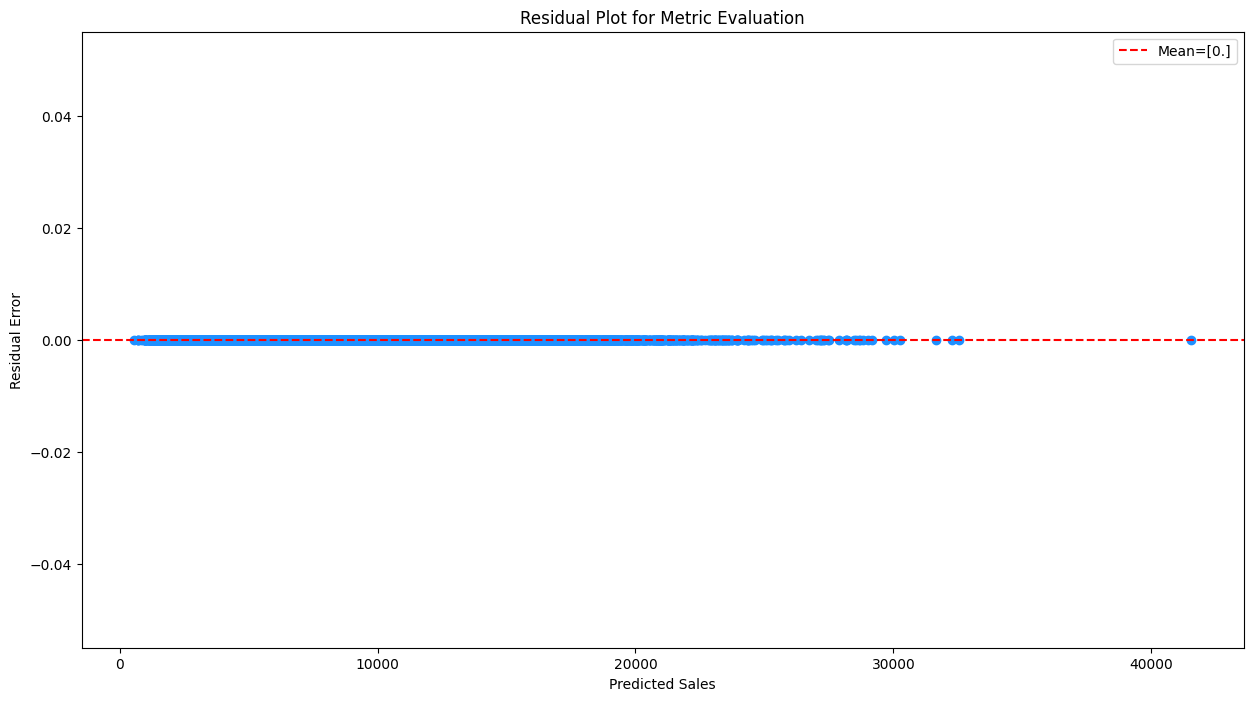

In [ ]:
# creating a residual plot by first transforming the log values back to original values
residuals = np.exp(y_test) - np.exp(y_test_regression_pred)
res_mean=residuals.mean().values.round(2)
plt.figure(figsize=(15,8))
plt.scatter(np.exp(y_test), residuals, c="dodgerblue")
plt.title("Residual Plot for Metric Evaluation")
plt.xlabel('Predicted Sales')
plt.ylabel('Residual Error')

plt.axhline(y=res_mean, color='red', linestyle='--', label=f"Mean={res_mean}")
plt.legend();

2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Applying cross validation to check for improvements
np.random.seed(42)  # for reproducible results
Glinear_regressor= LinearRegression()
parameters = {'fit_intercept':[True,False]}
Grid_reg = GridSearchCV(Glinear_regressor,parameters, scoring='neg_mean_squared_error', cv=5)

# Fit the Algorithm
Grid_reg.fit(X_train,y_train)
# Predict on the model
y_train_gridreg_pred = Grid_reg.predict(X_train)
y_test_gridreg_pred = Grid_reg.predict(X_train)

print(f"The best alpha value found out to be: {Grid_reg.best_params_}")
print(f"Negative mean square error is: {Grid_reg.best_score_}")

The best alpha value found out to be: {'fit_intercept': True}
Negative mean square error is: -0.14314722056390897


In [ ]:
#coefficients after hyperparamenter and crossvalidation
Grid_reg.best_estimator_.coef_

array([[ 0.00041172, -0.0355486 ,  0.16148054, -0.00329502,  0.00711196,
         0.02616501, -0.0298355 ,  0.04757363, -0.00388383,  0.00327245,
         0.07300146,  0.00304848,  0.00861294, -0.02624989,  0.05782414]])

In [ ]:
#intercept after hyperparamenter and crossvalidation
Grid_reg.best_estimator_.intercept_

array([8.75700665])

In [ ]:
#printing the performance metric for the model
lin_reg_met=regression_metrics("Linear Regression",y_train,y_train_gridreg_pred,y_test,y_test_regression_pred)


--------------------------------------------------
MAE on train is: 1981.996247354908
MAE on test is: 0.0
--------------------------------------------------
RMSE on train is: 2804.586021636581
RMSE on test is: 0.0
--------------------------------------------------
MAPE on train is: 30.997745566600777  %
MAPE on test is: 0.0  %
--------------------------------------------------
R2 on train is: 0.18377743487803944
R2 on test is: 1.0
--------------------------------------------------
Accuracy of train is: 69.00225443339923  %
Accuracy of test is: 100.0  %
--------------------------------------------------


In [ ]:

#adding metrics obtained from this model to metric_df
add_to_metric_df(lin_reg_met)

Which hyperparameter optimization technique have you used and why?
Only hyperparameter used was fit intercept. Linear Regression presents itself with very little option for hyperparameter optimization since it is the simplest model.

Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.
No improvement in metrics after cross validation, since the data with which we trained the Linear Regression model already has a lot of information. Training with Cross Validation will not help in improving the best fit line

Overall, seeing the R2 value of 0.18 on train data, Linear Regression model has not performed upto our expectation. It has scored Accuracy (=1- MAPE) of 69% on train data.

ML Model - 2 Elastic Net

Elastic net is a variation of Linear Regression and is a regularization technique to reduce the overshadowing (if any exists) of a feature over other features. This model is a combination of Lasso and Ridge regression. Since we have very small coefficients and no feature has particular shadowing effect on the target variable, we expect very little improvements in the model performance. We will be directly going to hyperparameter tuning to obtain the best parameter.

In [ ]:
# ML Model - 2 Implementation
el_net= ElasticNet()

# parameters for hypertuning
parameters_el_net = {"alpha": [1e-5,1e-4,1e-3,1e-2,1,5], "max_iter":[12,13,14,15]}

#instantiating gridsearchcv
Gridel_net = GridSearchCV(el_net, parameters_el_net, scoring='neg_mean_squared_error', cv=5)

# Fitting the Algorithm
Gridel_net.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.610e+04, tolerance: 1.167e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.766e+04, tolerance: 1.165e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.451e+04, tolerance: 1.146e

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 1, 5],
                         'max_iter': [12, 13, 14, 15]},
             scoring='neg_mean_squared_error')

In [ ]:
# Predict on the model
y_train_el_net_pred = Gridel_net.predict(X_train)
y_test_el_net_pred = Gridel_net.predict(X_test)

print(f"The best alpha value found out to be: {Gridel_net.best_params_}")
print(f"Negative mean square error is: {Gridel_net.best_score_}")

The best alpha value found out to be: {'alpha': 0.001, 'max_iter': 13}
Negative mean square error is: -0.14313559047510646


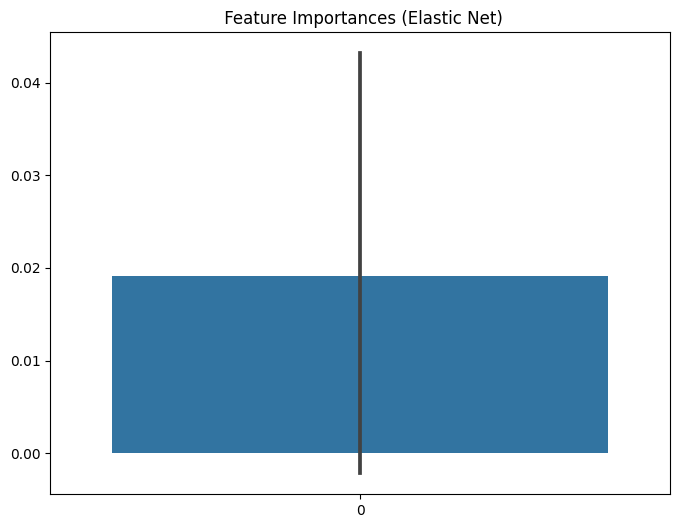

In [ ]:
#plotting the feature importances
Gridel_net.best_estimator_.coef_
# Checking the coefficients
temp=pd.DataFrame()
temp["Features"]=X_train.columns
temp["Coefficients"]=Gridel_net.best_estimator_.coef_.tolist()
temp.sort_values(by=["Coefficients"],ascending= False, inplace= True)
sns.barplot(temp["Coefficients"])
plt.title(" Feature Importances (Elastic Net)");

Elastic Net model has a similar result with respect to Linear Regression model, except for the fact that Store column has been totally eliminated which indicates store number has least impact on the sales.

1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
el_net_met=regression_metrics("Elastic Net",y_train,y_train_el_net_pred,y_test,y_test_el_net_pred)


--------------------------------------------------
MAE on train is: 1981.7619625782868
MAE on test is: 1909.5737058732632
--------------------------------------------------
RMSE on train is: 2805.2776033001874
RMSE on test is: 2721.4233393119575
--------------------------------------------------
MAPE on train is: 30.995747234718447  %
MAPE on test is: 28.39409940142969  %
--------------------------------------------------
R2 on train is: 0.18337484130229775
R2 on test is: 0.22391043664461285
--------------------------------------------------
Accuracy of train is: 69.00425276528155  %
Accuracy of test is: 71.60590059857032  %
--------------------------------------------------


In [ ]:
#to add to metric_df the performance of the model
add_to_metric_df(el_net_met)

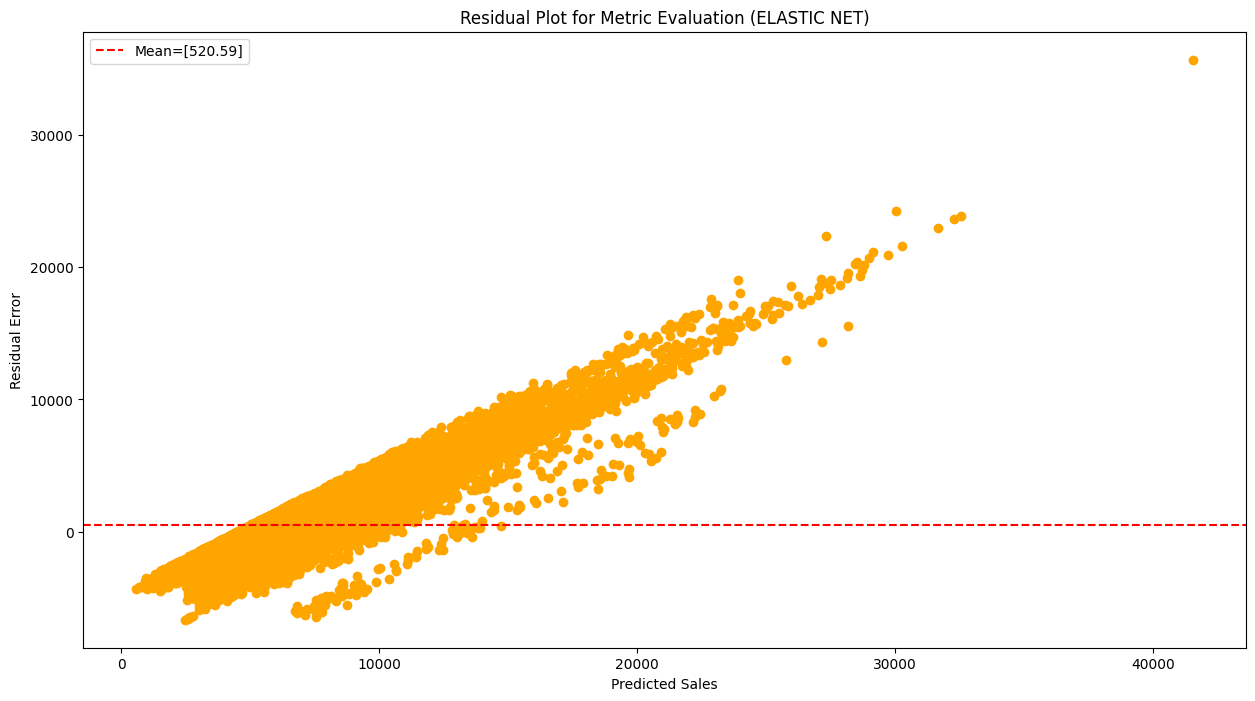

In [ ]:
#plotting the residual plot with a scatter chart
y_test_el_net_pred=pd.DataFrame(y_test_el_net_pred).values
residuals =np.exp(y_test) - np.exp(y_test_el_net_pred)
res_mean=residuals.mean().values.round(2)
plt.figure(figsize=(15,8))
plt.scatter(np.exp(y_test), residuals, c="orange")
plt.title("Residual Plot for Metric Evaluation (ELASTIC NET)")
plt.xlabel('Predicted Sales')
plt.ylabel('Residual Error')

plt.axhline(y=res_mean, color='red', linestyle='--', label=f"Mean={res_mean}")
plt.legend();

2. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.
Here if we observe the Mean absolute Error, there is no improvement in it if we compare it from previous Linear Regression model. Hence if we apply this model, on an average we might be away from the predictions by $2000(approx).

Since, the Linear Regression and Elastic Net model have worked on the same lines, we have observed same trend in the residual error for both models.

For outliers, these two models have predicted values greater than expectations (example- a value that has actual value of 40,000, was predicted about 75,000)

Seeing the density plot of Sales feature, the Residual error is concentrated around zero near the mean of sales data (where the density is highest).



One positive thing (from Business point of view) is that our model, at no instance, has predicted low sales for the time when there is supposed to be an exceptionally high sales.

ML Model - 3 Random Forest

In [ ]:
# Creating Ridge instance
Rf_reg= RandomForestRegressor()

# Defining parameters
parameters= {'n_estimators':[100], 'max_depth': [17,19,20], 'min_samples_leaf': [1, 2]}

In [ ]:
# Train the model
GridRf_reg = RandomizedSearchCV(Rf_reg, parameters, n_iter=5, n_jobs=-1, scoring='neg_mean_squared_error', cv=3,  verbose=3)
GridRf_reg.fit(X_train,y_train)


Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=5, n_jobs=-1,
                   param_distributions={'max_depth': [17, 19, 20],
                                        'min_samples_leaf': [1, 2],
                                        'n_estimators': [100]},
                   scoring='neg_mean_squared_error', verbose=3)

In [ ]:

# Predict the output
y_train_grid_Rf_pred = GridRf_reg.predict(X_train)
y_test_grid_Rf_pred = GridRf_reg.predict(X_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {GridRf_reg.best_params_}")
print(f"Negative mean square error is: {GridRf_reg.best_score_}")

The best alpha value found out to be: {'n_estimators': 100, 'min_samples_leaf': 2, 'max_depth': 20}
Negative mean square error is: -0.052984090240116626


In [ ]:

# Calculating Regression Metrics
rf_met=regression_metrics("Random Forest",y_train,y_train_grid_Rf_pred,y_test,y_test_grid_Rf_pred)

--------------------------------------------------
MAE on train is: 761.9551341755649
MAE on test is: 970.1237492152248
--------------------------------------------------
RMSE on train is: 1165.194436895771
RMSE on test is: 1441.9678095482068
--------------------------------------------------
MAPE on train is: 11.350921885121986  %
MAPE on test is: 14.031722803818756  %
--------------------------------------------------
R2 on train is: 0.8591139893726065
R2 on test is: 0.7821132787182272
--------------------------------------------------
Accuracy of train is: 88.64907811487801  %
Accuracy of test is: 85.96827719618125  %
--------------------------------------------------


In [ ]:
# test casting the predicted value
y_test_grid_Dt_pred=pd.DataFrame(y_train_grid_Rf_pred).values

<ipython-input-142-29bfb335c465>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  plot = df_plot.groupby(['Date'])['Sales','Pred_Sales'].sum()


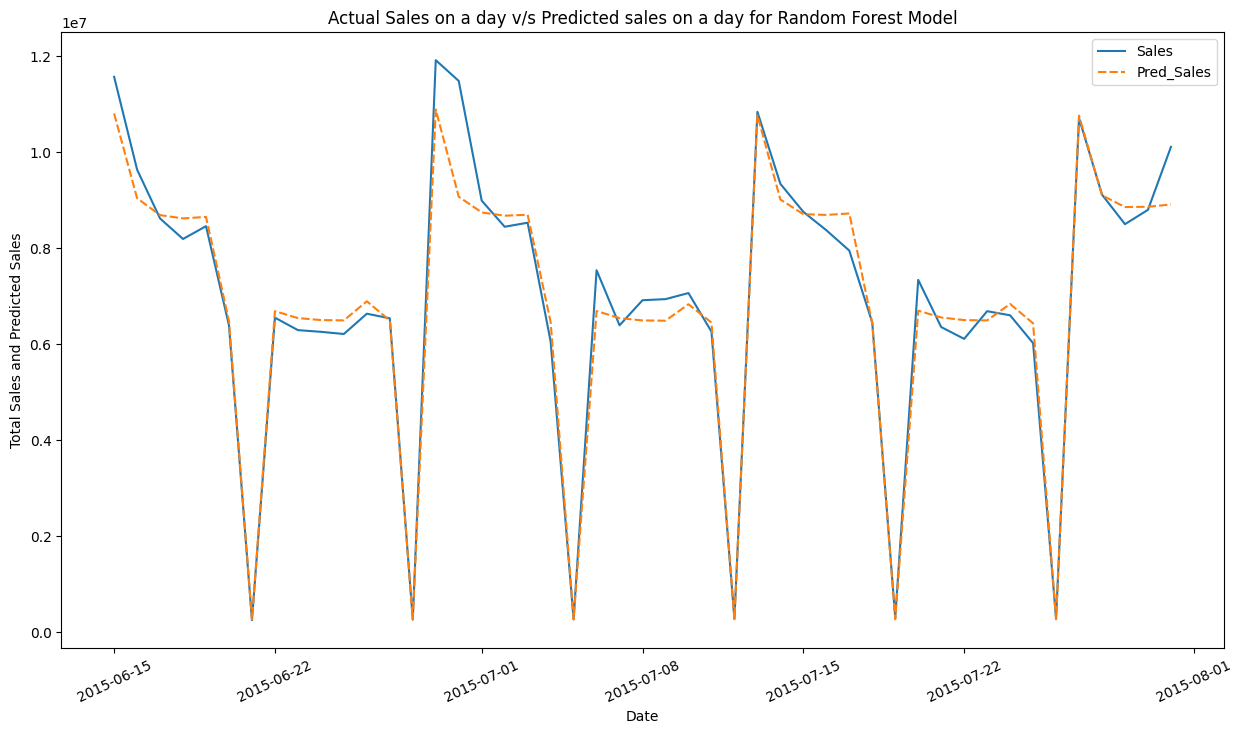

In [ ]:
plt.figure(figsize=(15,8))
a = pd.DataFrame()
a["Sales"] = np.exp(y_test)["lnSales"]
a['Pred_Sales'] = np.exp(y_test_grid_Rf_pred)
a["Date"]=(merged_df[merged_df["Date"]>end_train]["Date"])
a=a[["Date","Sales","Pred_Sales"]]
df_plot = a.copy()
plot = df_plot.groupby(['Date'])['Sales','Pred_Sales'].sum()
sns.lineplot(data=plot)

plt.ylabel("Total Sales and Predicted Sales")
plt.xticks(rotation = 25)
plt.title("Actual Sales on a day v/s Predicted sales on a day for Random Forest Model")

plt.legend();

In [ ]:
#adding the performance metrics to metric_df
add_to_metric_df(rf_met)


Which ML model did you choose from the above created models as your final prediction model and why?

We will be making our decision of choosing the model based on R2 score, since it is a very good indicator of possibilty of variance on test data also. Based on the values of metric obtained from different models, Random Forest Model would be the model choosen for predicting Sales.

Our models are not doing good in predicting the values at extreme points, which could have been handled by removing the outliers in Sales, but by not removing the outliers we get the right indication for high sales if not the exact value. For a business like Rossmann store, keeping stock for average sales would be necessary at all times. But if we miss the opportunity for high sales ,we will have far more than just monetary impact. It will also impact the image of Rossmann store as a drug/ parmaceutical store not being able to provide necessary items.

Explain the model which you have used and the feature importance using any model explainability tool?

**Feature Importances**

Text(0.5, 0, 'Relative Importance')

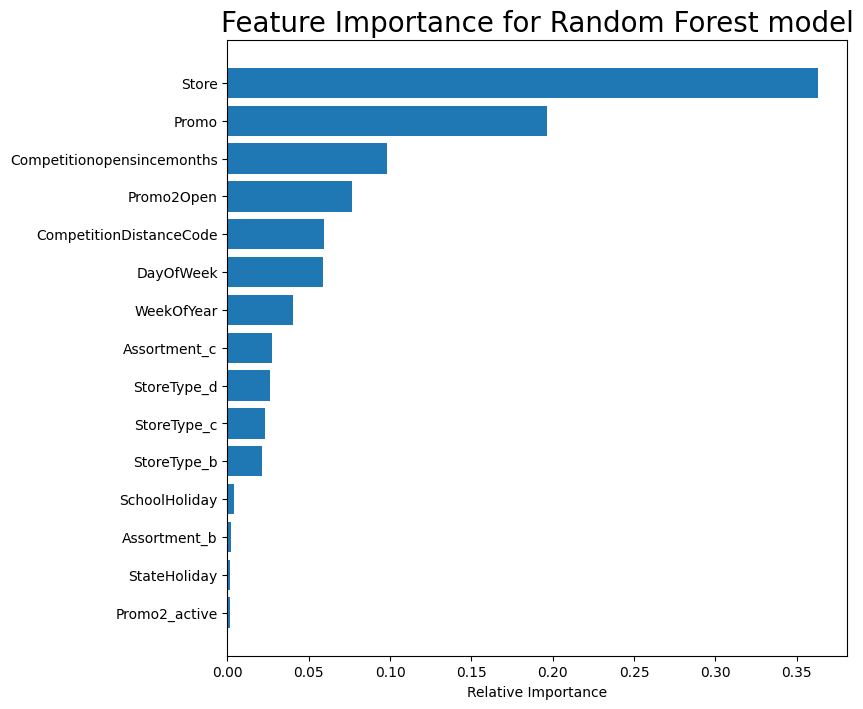

In [ ]:
#plotting feature importances of Random Forest model
features = X_train.columns
importances = GridRf_reg.best_estimator_.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8,8))
plt.title('Feature Importance for Random Forest model', fontsize=20)
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')


In [ ]:
#loading LIME explainer with train data
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns.values.tolist(),verbose=True, mode='regression')


In [ ]:
# Choose the 100th instance of test data and use it to predict the results
j = 100
exp = explainer.explain_instance(X_test.values[j],GridRf_reg.predict, num_features=6)
exp.show_in_notebook(show_table=True)
# output not showing in github, so we are saving it as an html file
#exp.save_to_file('/content/drive/MyDrive/AlmaBetter/Capstone_Project_2/lime.html')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 8.826317617579704
Prediction_local [9.00361666]
Right: 9.023527756134856


A Random Forest is a supervised machine learning algorithm that is constructed from decision tree algorithms. It utilizes ensemble learning, which is a technique that combines many classifiers to provide solutions to complex problems. It predicts by taking the average or mean of the output from various trees. Increasing the number of trees increases the precision of the outcome.

Random Forest is a black box model so we would use model agnostic approach to explain it with LIME.

According to LIME explainer, When we analyse our trained Random Forest Model:

Promotions have a postive impact,
Store type b and assortment c will also impact the sales
Continuing promotions (promo2open) will impact positively also with competition distance
competitionopensincemonths will have a negative impact on sales
These all are the 6 most important features according to LIME

# **Conclusion**

We have now completed the project.We have decided to use Random Forest for predicting our values. overall we noticed improvement in all models as we moved ahead. Here is a table will all the metric values analyzed for seeing the performance.

In [ ]:
metric_df

Model_Name    Train_MAE   Train_RMSE  Train_R2  Train_MAPE  \
0  Linear Regression  1981.996247  2804.586022  0.183777   30.997746   
1        Elastic Net  1981.761963  2805.277603  0.183375   30.995747   
2      Random Forest   761.955134  1165.194437  0.859114   11.350922   

   Train_Accuracy     Test_MAE    Test_RMSE   Test_R2  Test_MAPE  \
0       69.002254     0.000000     0.000000  1.000000   0.000000   
1       69.004253  1909.573706  2721.423339  0.223910  28.394099   
2       88.649078   970.123749  1441.967810  0.782113  14.031723   

   Test Accuracy  
0     100.000000  
1      71.605901  
2      85.968277

Clearly, Random Forest is outperforming other models in terms of each metric. And overall accuracy of the model is improved in predicting values. Thus the ensemble technique (Bagging) applied after has given us improved results and reduced our Mean absolute error to $761.

Overall, this project has helped us do hands on EDA on sales data, do hypothesis testing from the hypothesis formulated from the EDA. Also we did apply feature engineering and model agnostic approach to explain a model for the first time.

**Challenges Faced:**

* Very high computation time for some charts like pair plot and also for fitting for Random Forest Model
* Handling Null values and Outliers

**Resources:**

* Scipy documentation
* Almabetter recorded lectures
* Geek for Geeks